# Unsupervised Learning: Trade&Ahead

**Marks: 60**

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries

In [80]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [81]:
## Complete the code to import the data
data = pd.read_csv('stock_data.csv')

In [82]:
# copy data to another variable to avoid any changes to original data
df = data.copy()

##Data Overview##





The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [83]:
# return the number of rows by the number of columns of data
df.shape

(340, 15)

* Training data has 340 columns and 15 rows.

In [84]:
# return the first five rows of data
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [85]:
# return the last five rows of data
df.tail()

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

### Checking the data types of the columns for the dataset

In [86]:
# print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

* Most of the variables are numeric, in type of float and int.

### Checking for duplicate values

In [87]:
# check for duplicates
duplicates = df.duplicated()
# print the duplicated rows
print(df[duplicates])

Empty DataFrame
Columns: [Ticker Symbol, Security, GICS Sector, GICS Sub Industry, Current Price, Price Change, Volatility, ROE, Cash Ratio, Net Cash Flow, Net Income, Earnings Per Share, Estimated Shares Outstanding, P/E Ratio, P/B Ratio]
Index: []


In [88]:
df.duplicated().sum()

0

* There is no dublicate.

### Checking for missing values

In [89]:
# check missing values across each columns in training data
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

* There is no missing value.

### Statistical summary of the dataset

In [90]:
# check statistical summary of the all data
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

* Max values for most of the variables are much higher than 75% values, which indicate presence of outliers.


## Exploratory Data Analysis

### Univariate analysis

In [91]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`Current Price`**

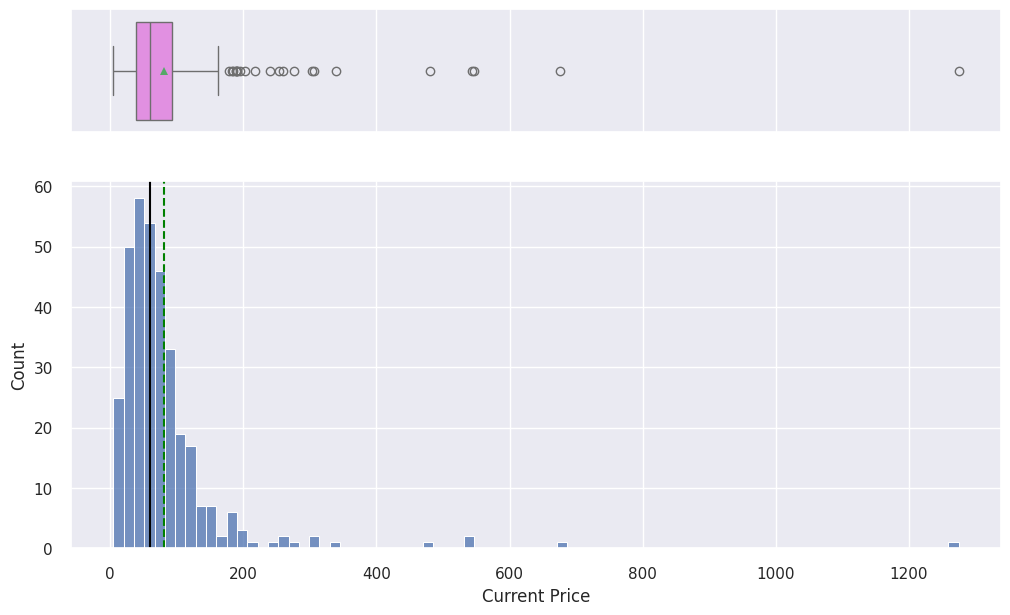

In [92]:
histogram_boxplot(df, 'Current Price')

* Left skewed distribution.
* There are outliers.

**`Price Change`**

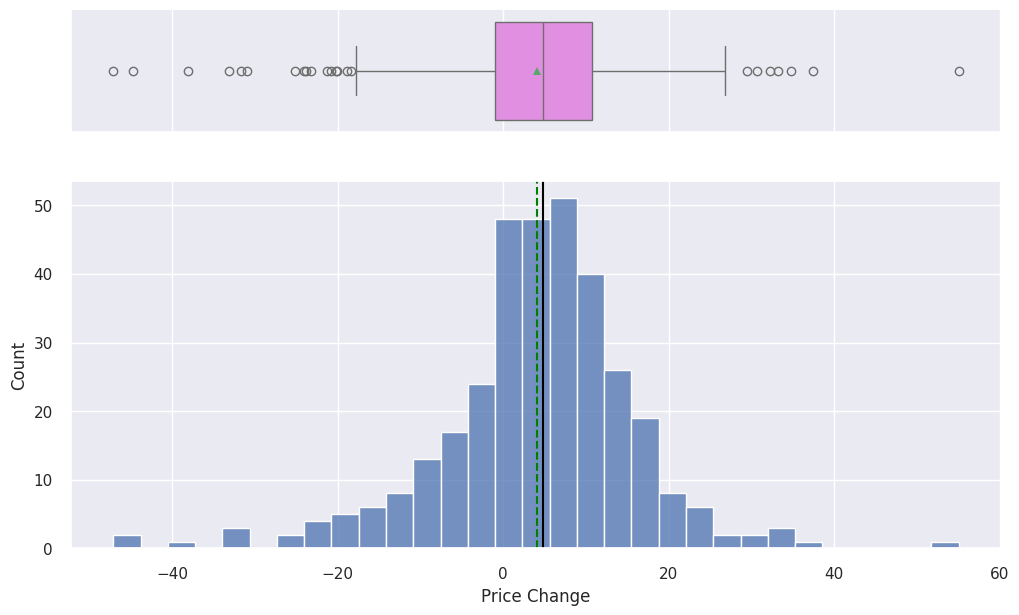

In [93]:
histogram_boxplot(df,'Price Change')

* Normal distribution. Mean price change is similar to median price change.

**`Volatility`**

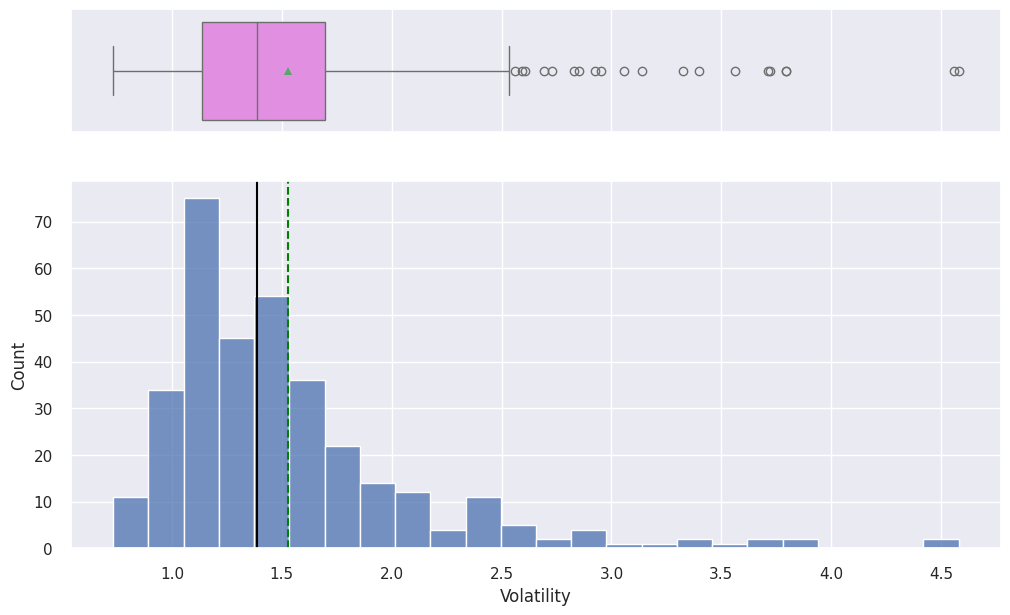

In [94]:
histogram_boxplot(df,'Volatility')

**`ROE`**

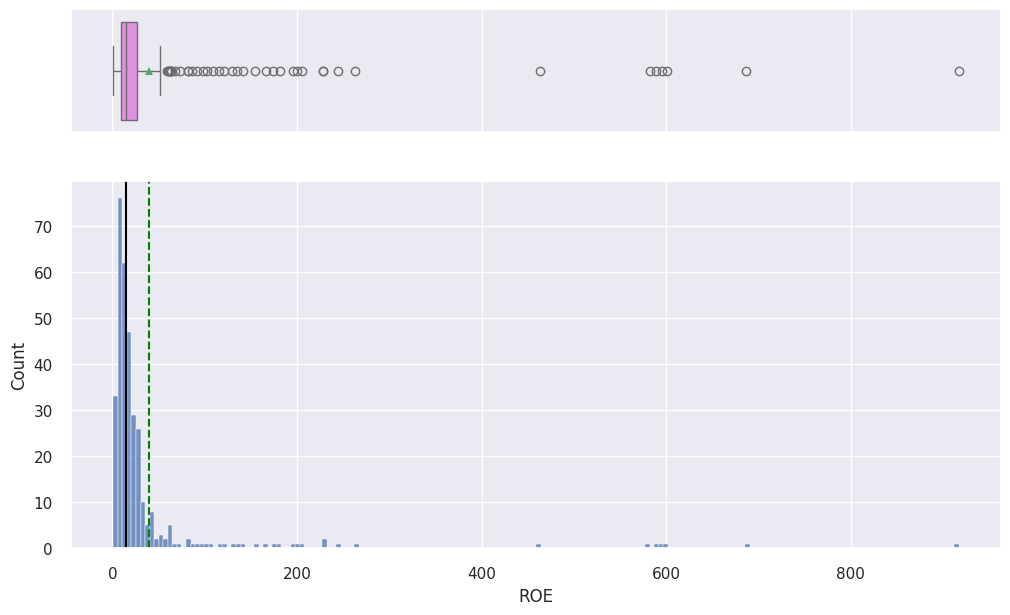

In [95]:
histogram_boxplot(df,'ROE')

**`Cash Ratio`**

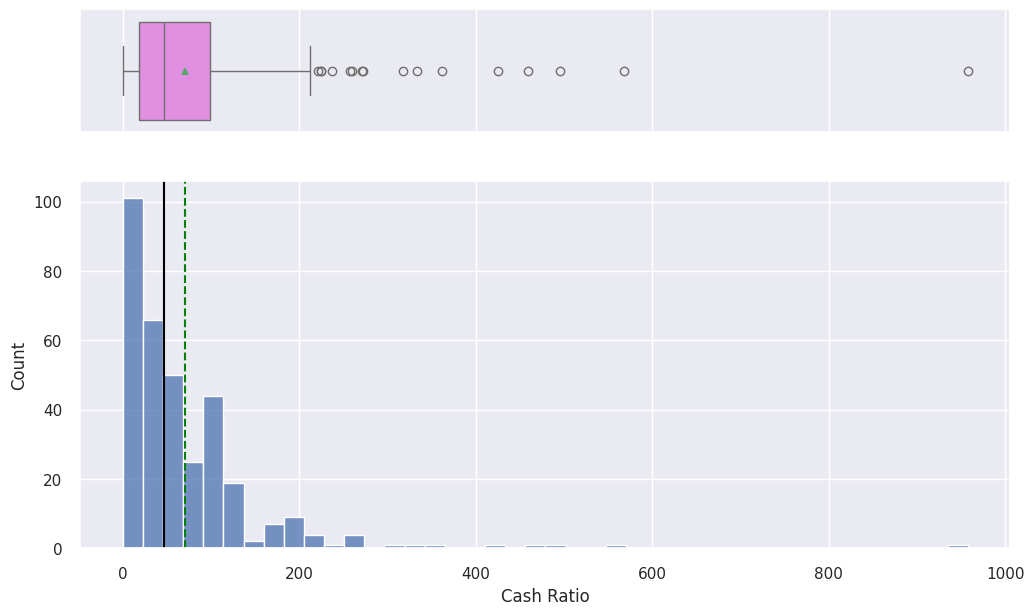

In [96]:
histogram_boxplot(df,'Cash Ratio')

**`Net Cash Flow`**

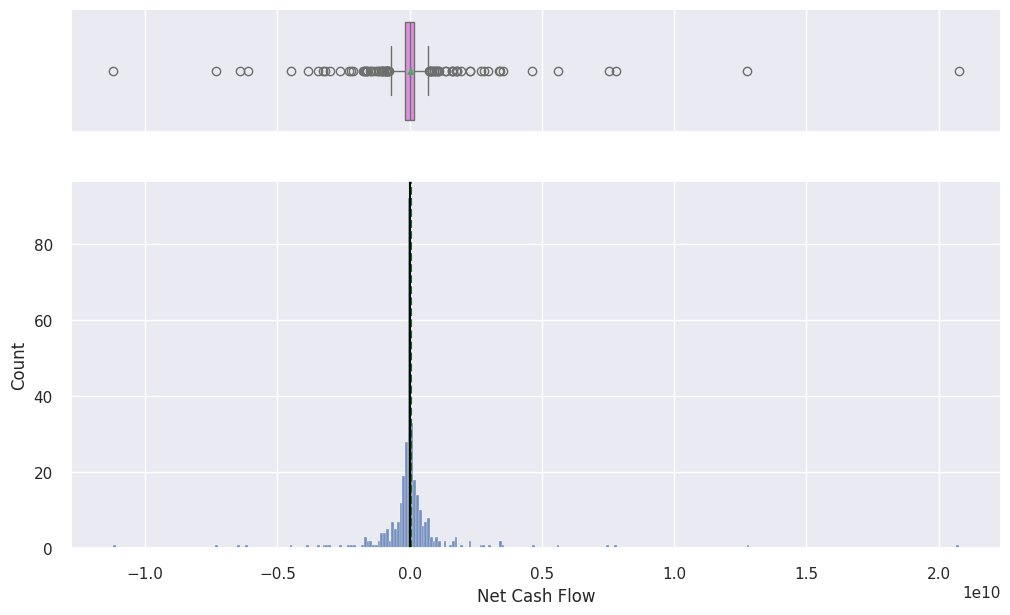

In [97]:
histogram_boxplot(df,'Net Cash Flow')

**`Net Income`**

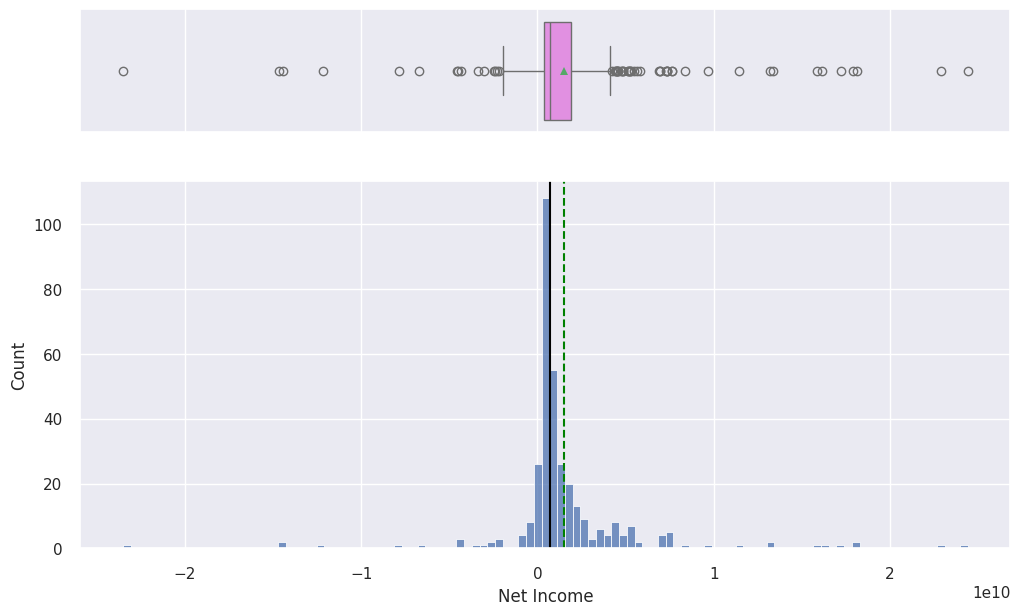

In [98]:
histogram_boxplot(df, 'Net Income')

**`Earnings Per Share`**

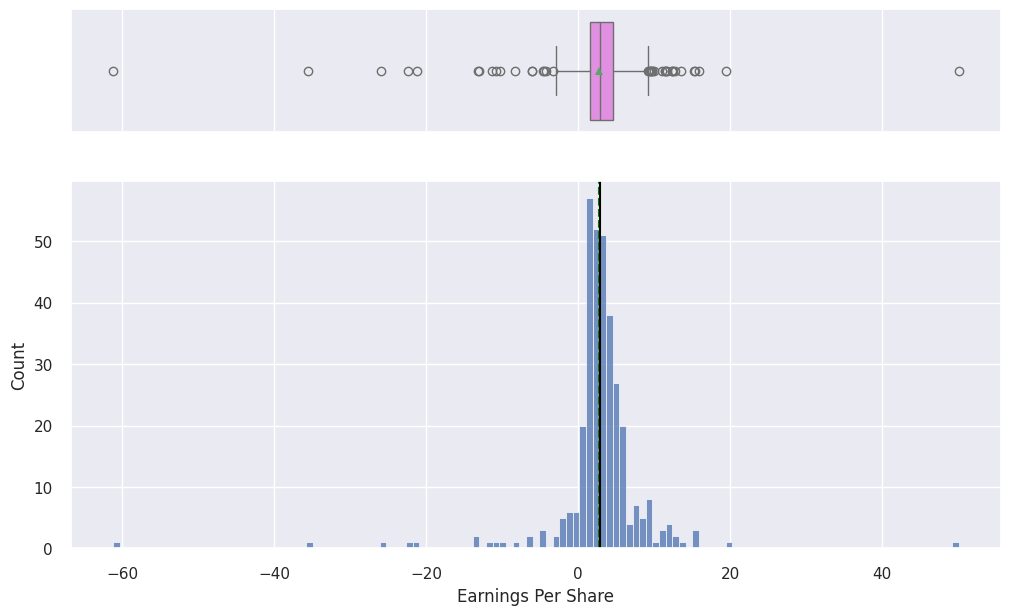

In [99]:
histogram_boxplot(df, 'Earnings Per Share')

**`Estimated Shares Outstanding`**

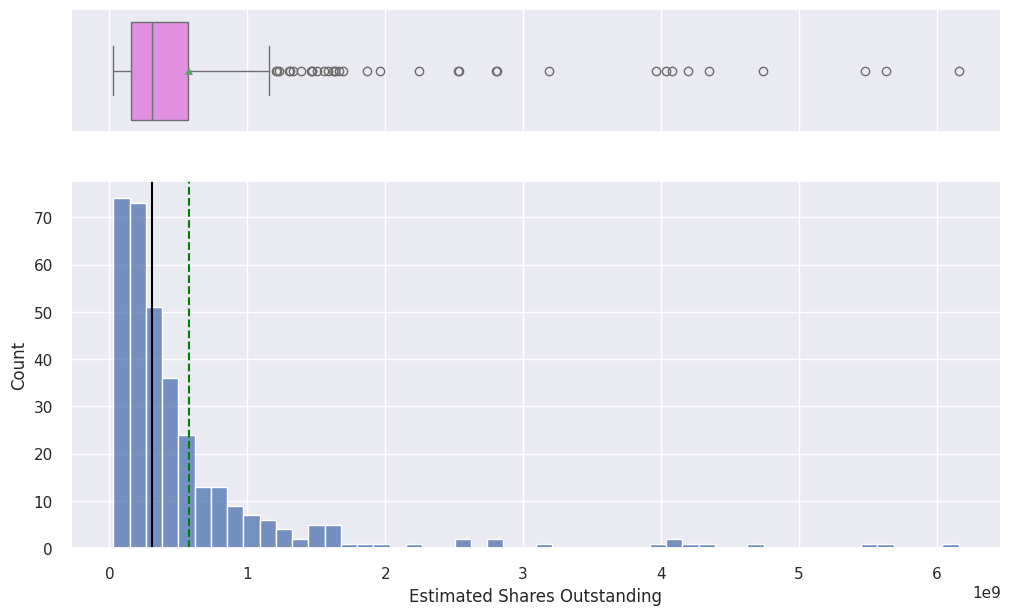

In [100]:
histogram_boxplot(df,'Estimated Shares Outstanding')

**`P/E Ratio`**

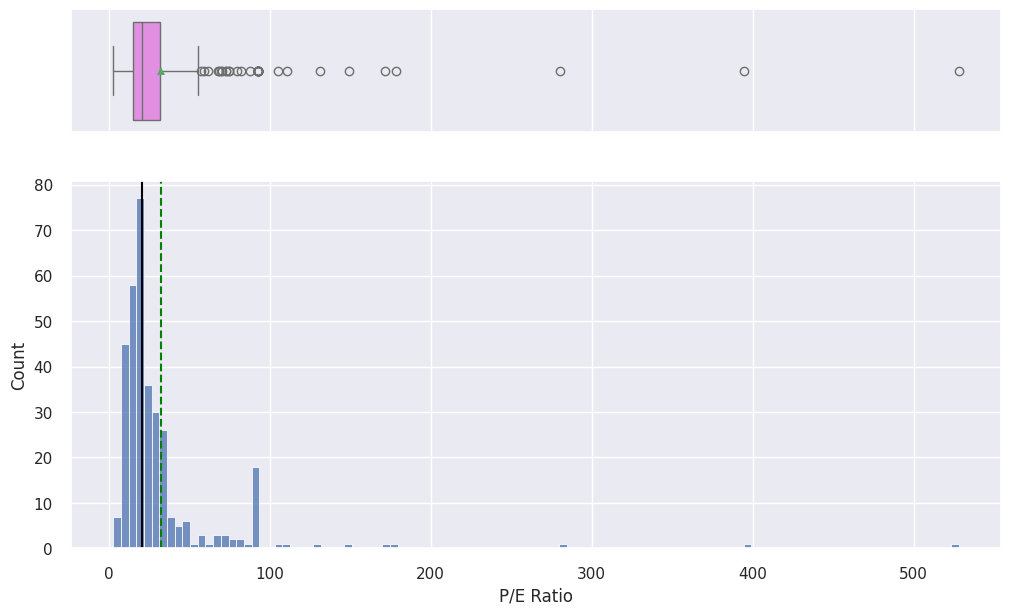

In [101]:
histogram_boxplot(df,'P/E Ratio')

**`P/B Ratio`**

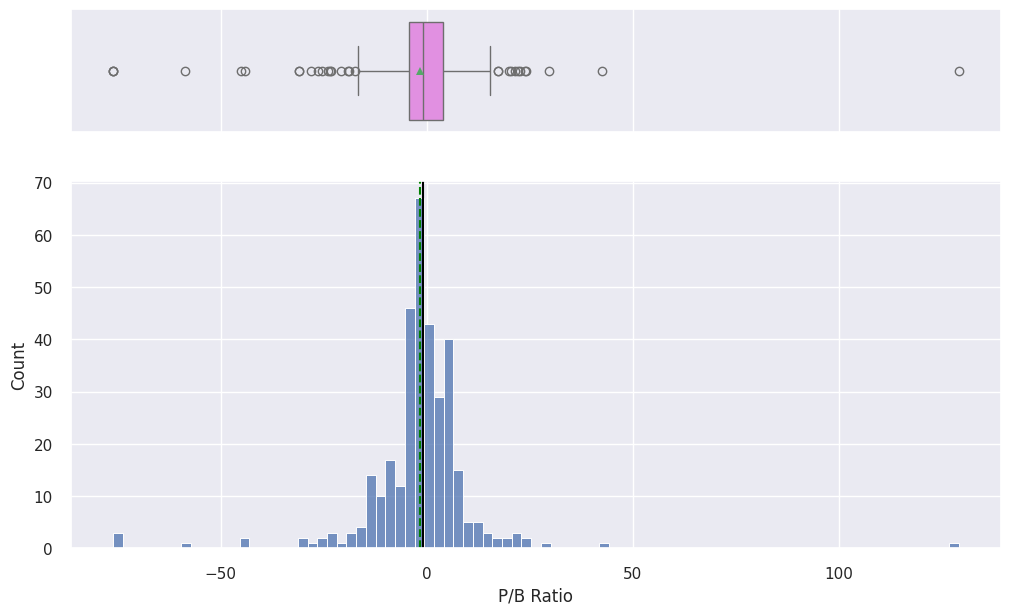

In [102]:
histogram_boxplot(df, 'P/B Ratio')

In [103]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`GICS Sector`**

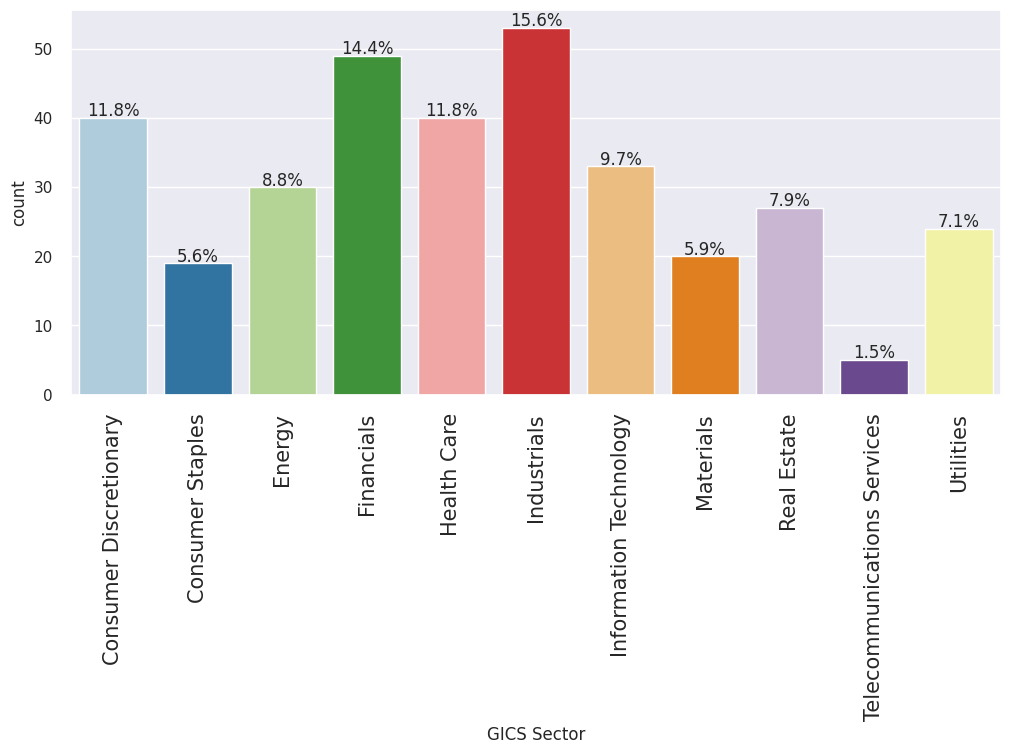

In [104]:
labeled_barplot(df, 'GICS Sector', perc=True)

**`GICS Sub Industry`**

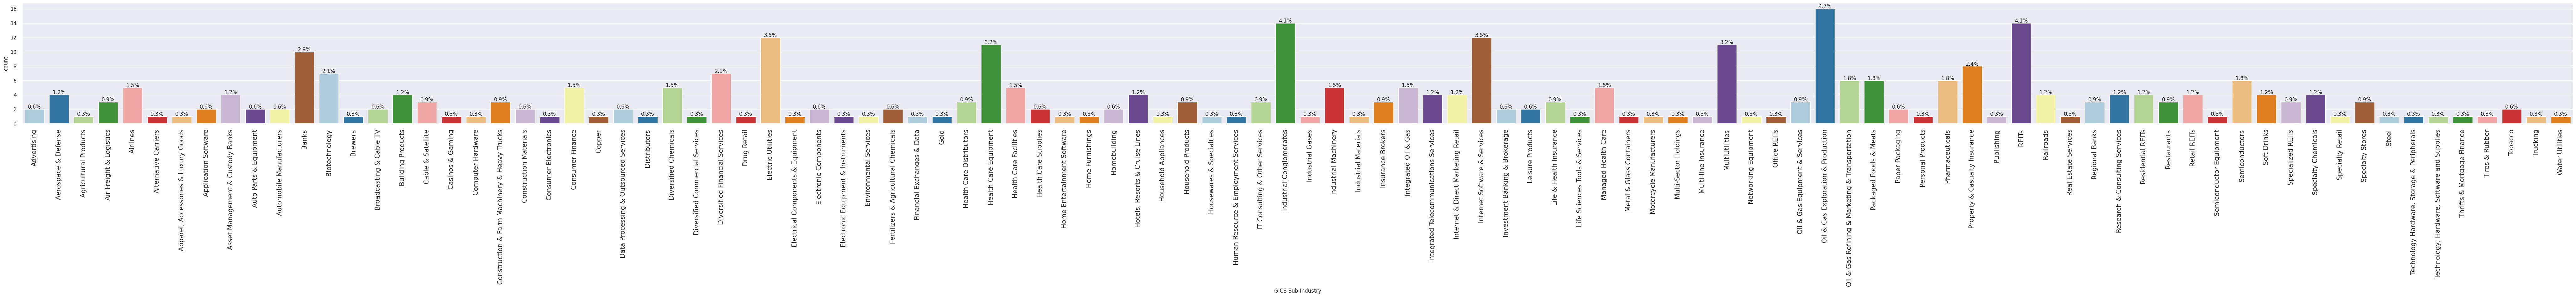

In [105]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

### Bivariate Analysis

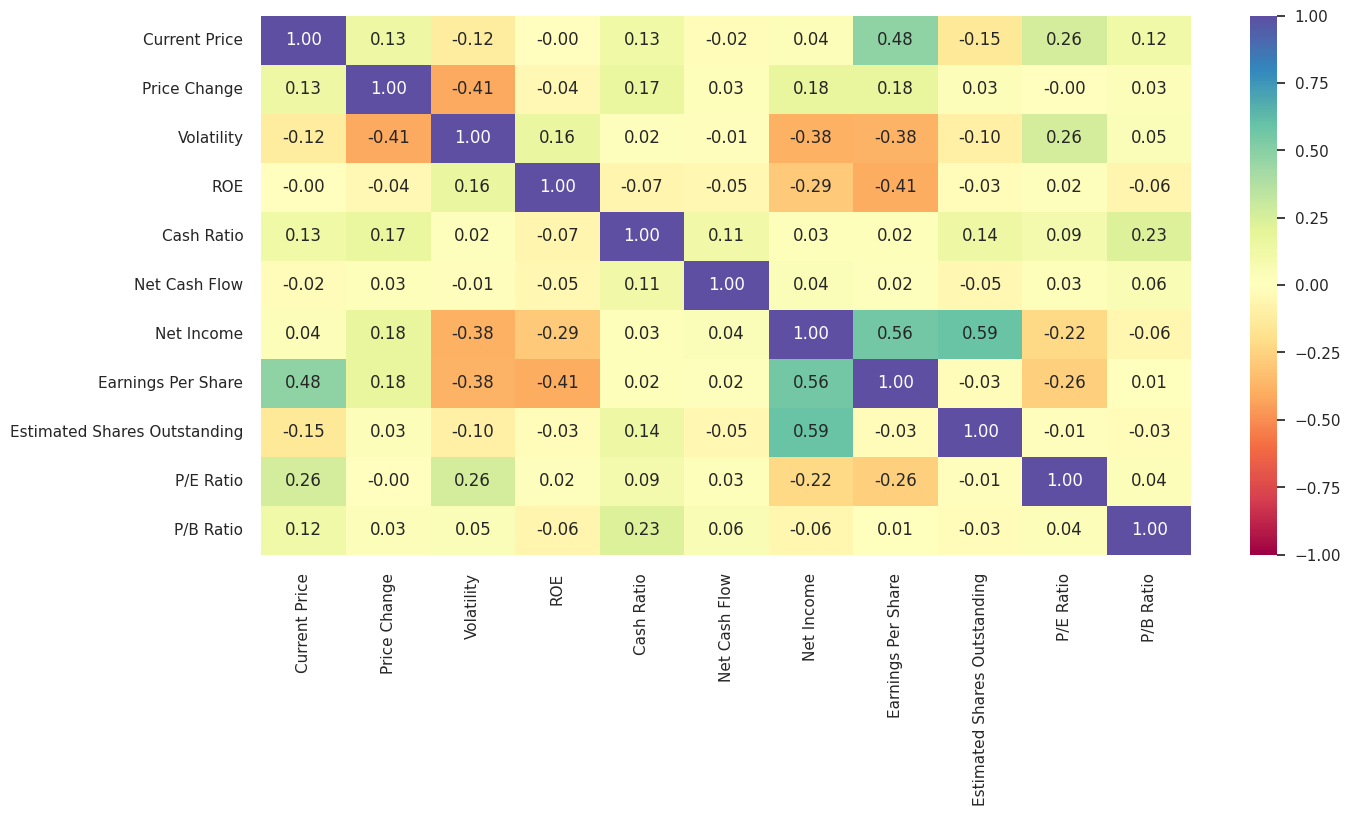

In [106]:
# correlation check
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is a positive moderate correlation between net income and estimated shares outstanding.
* There is a positive moderate correlation between net income and earning per share.
* There is a positive moderate correlation between current price and earning per share.
* There is a negative moderate correlation between price change and volatility.

In [107]:
num_col=['Current Price','Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

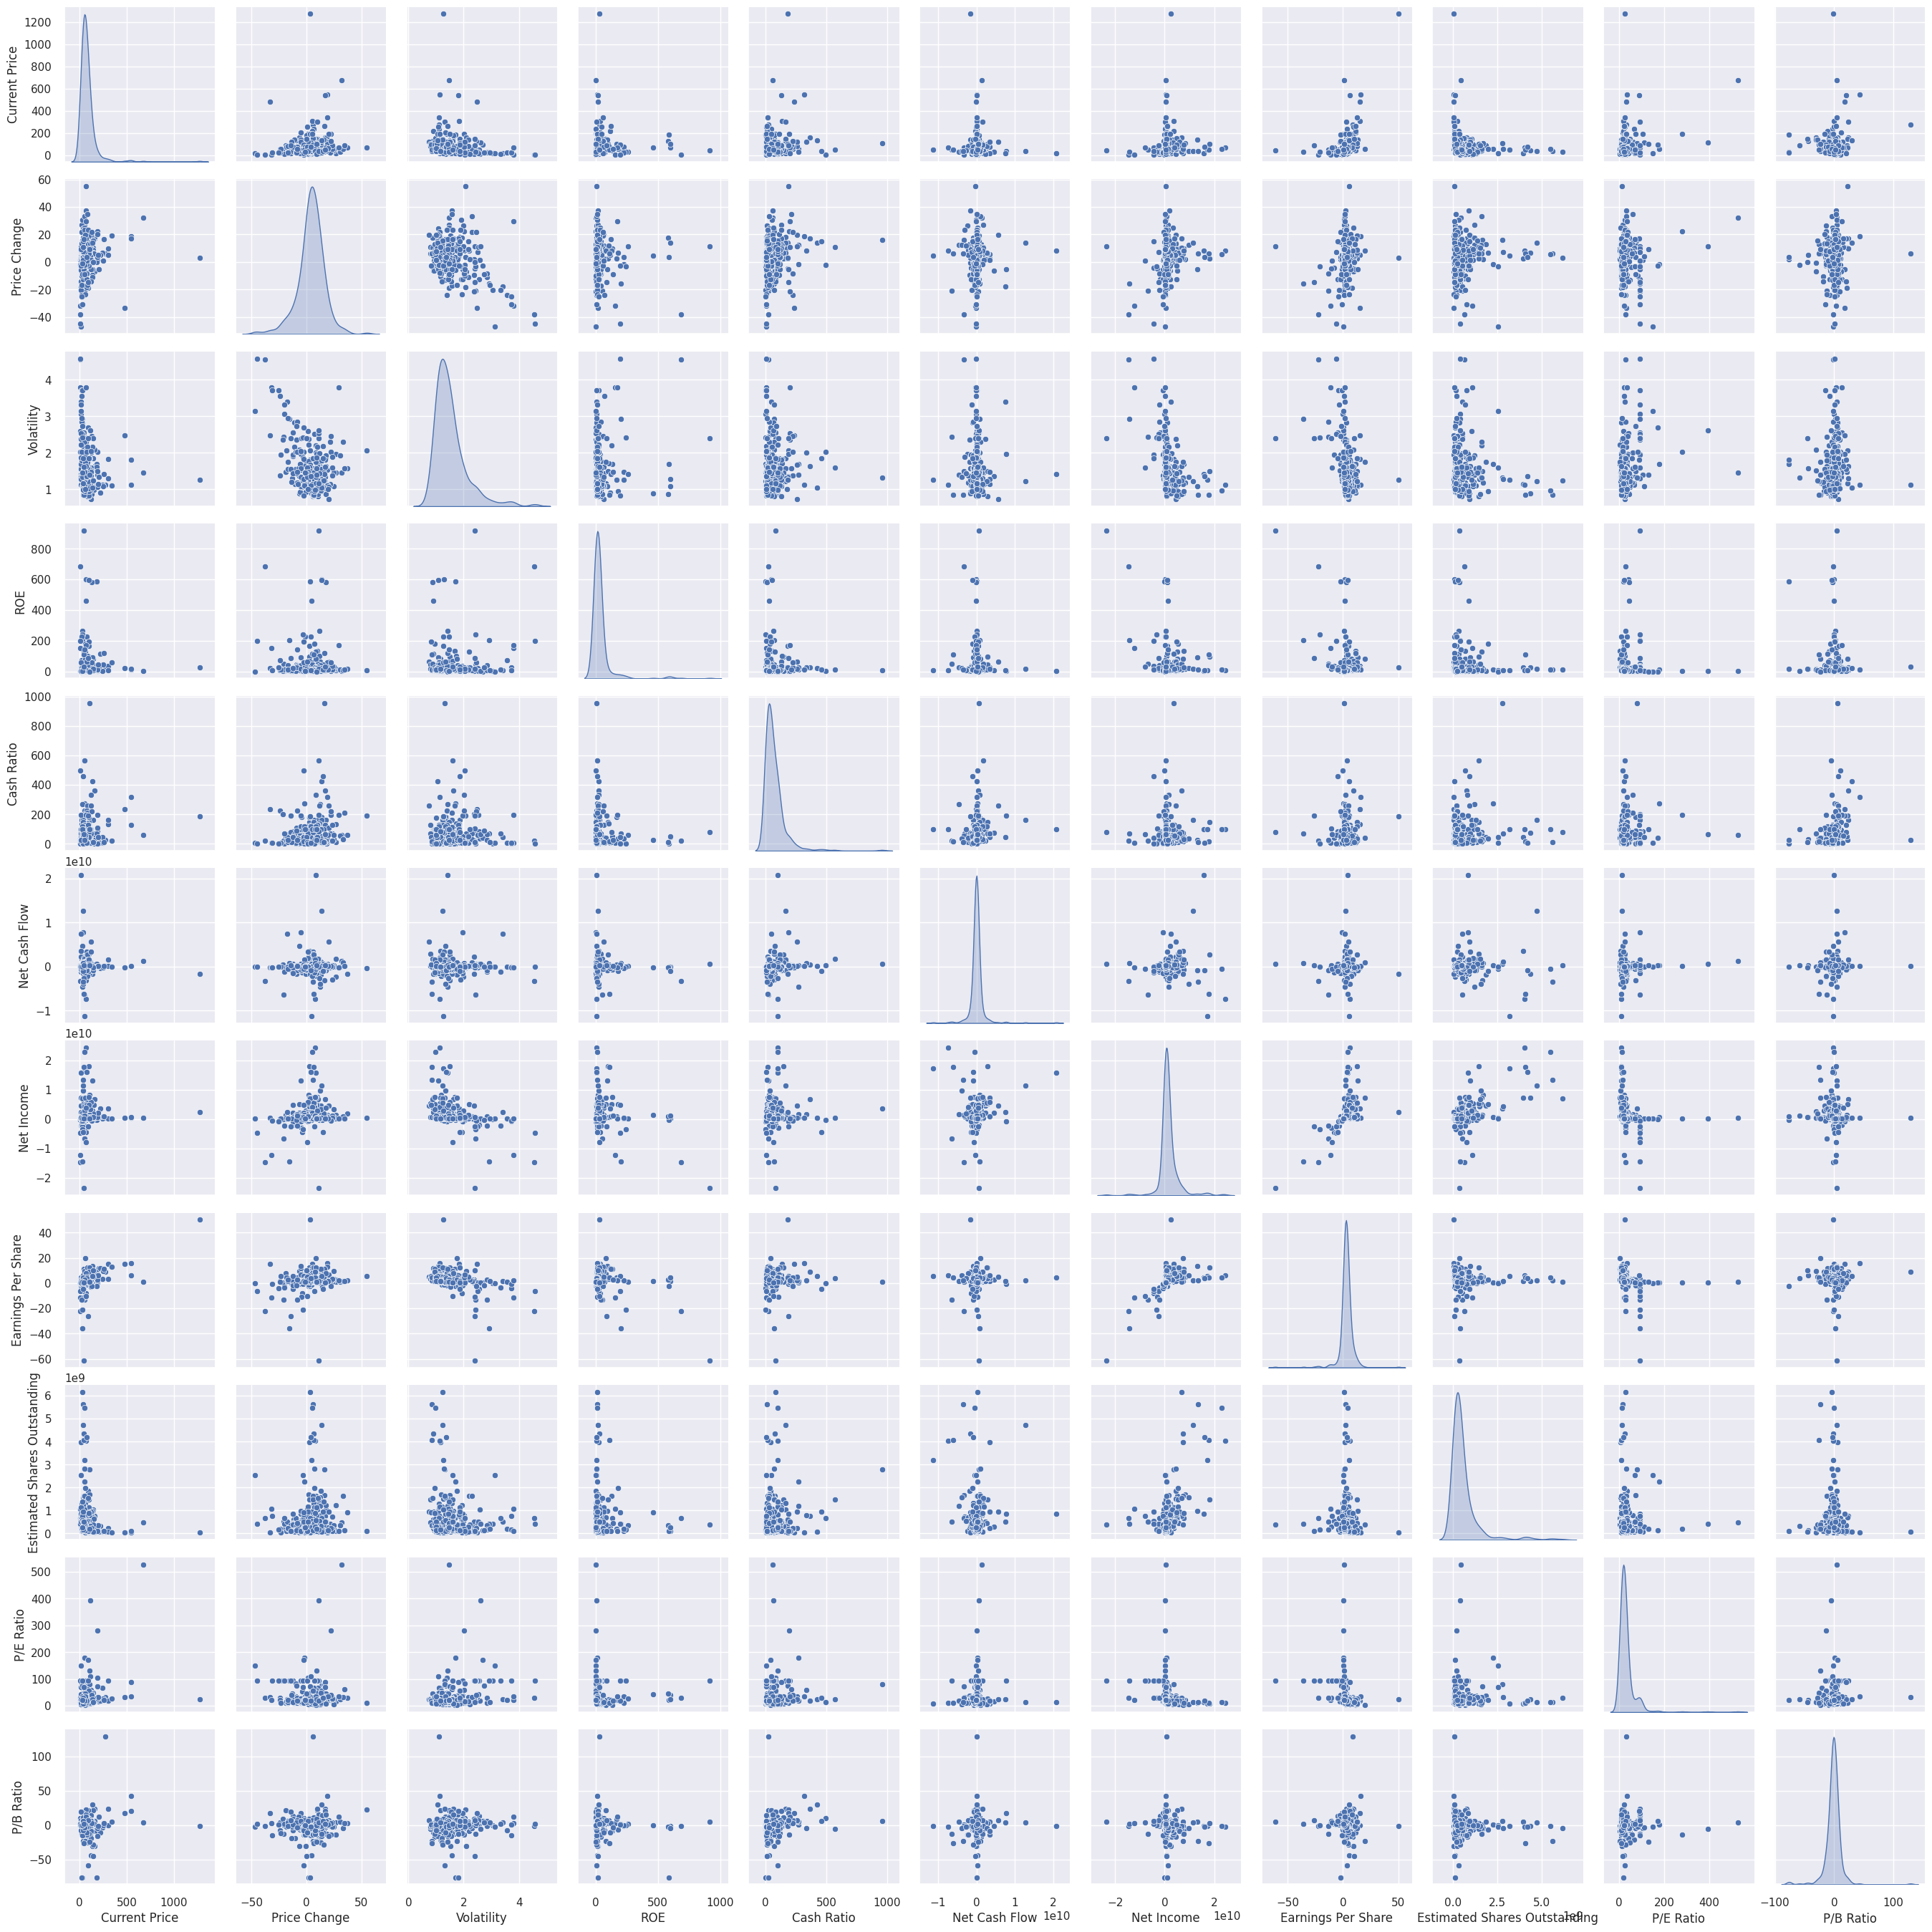

In [108]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

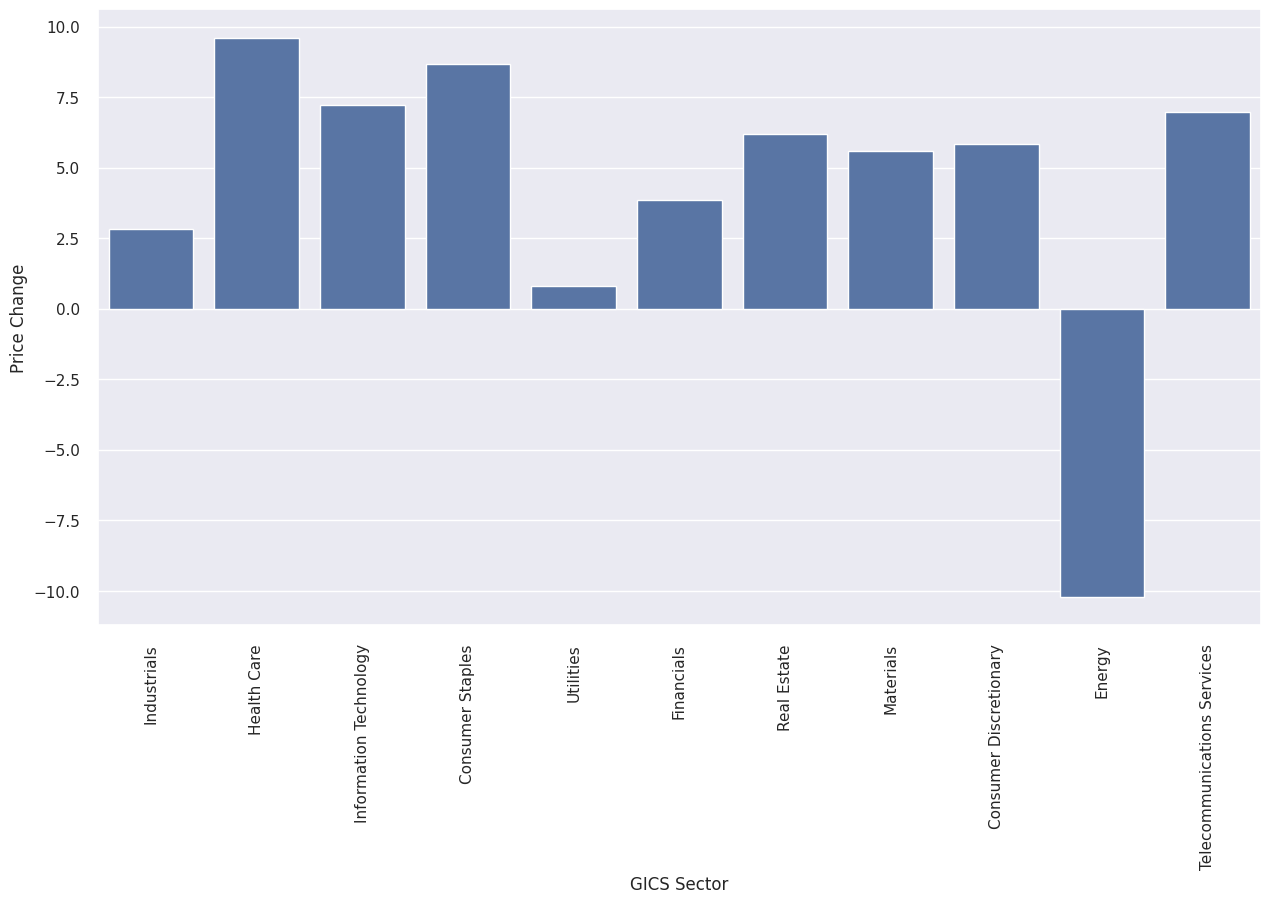

In [109]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

* Health Care has seen the maximum price increase.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

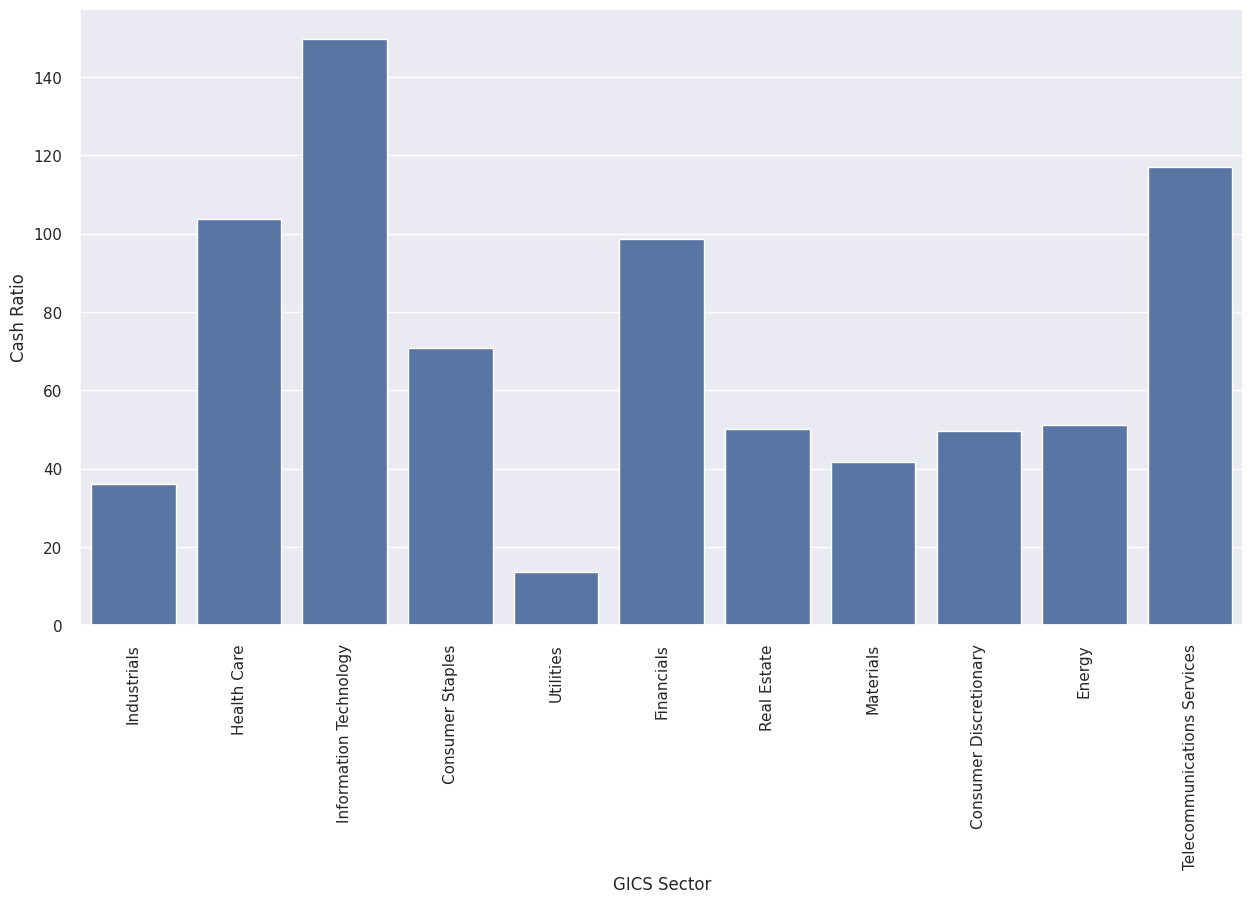

In [110]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

* Information Technology sector has highest cash ratio.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

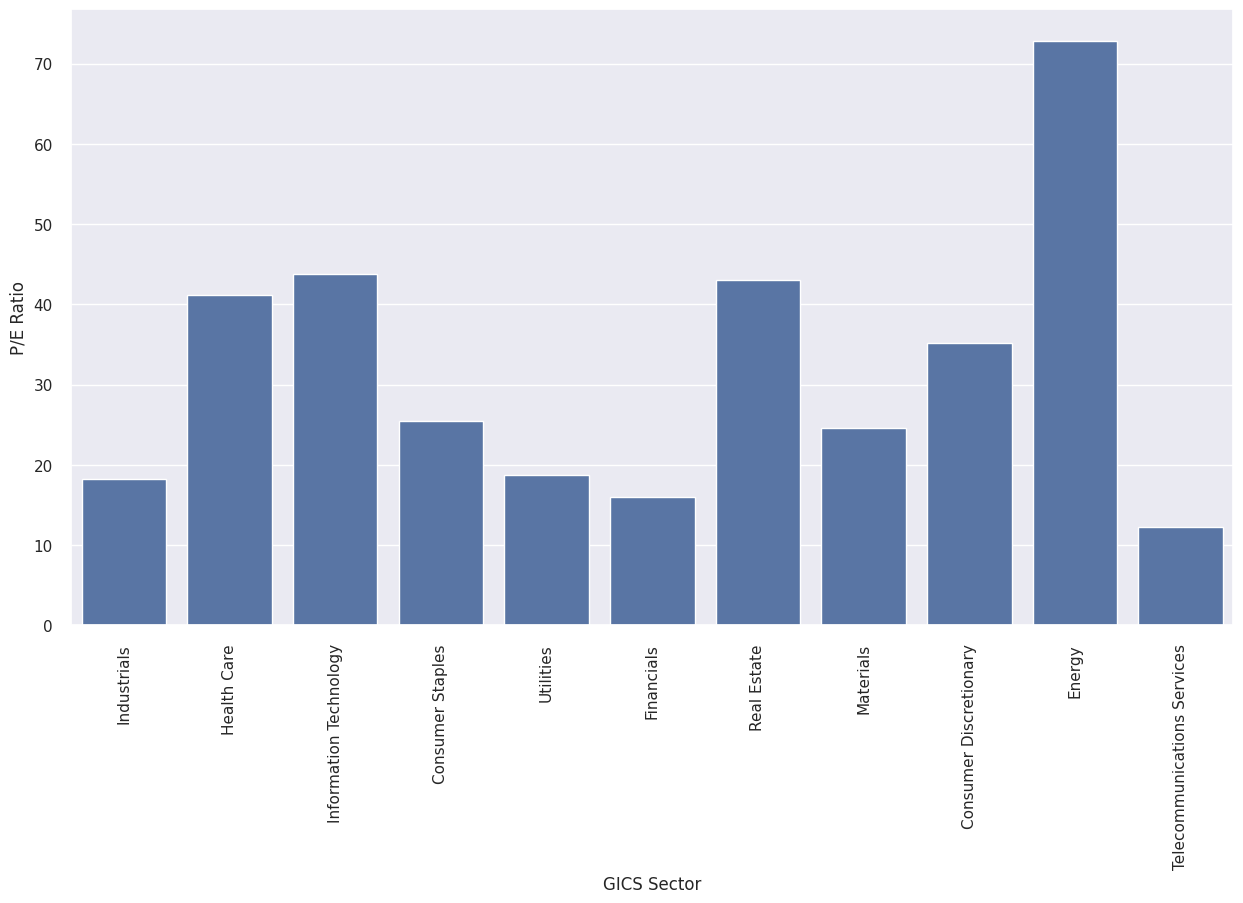

In [111]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

* Energy sector has the highest P/E Ratio.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

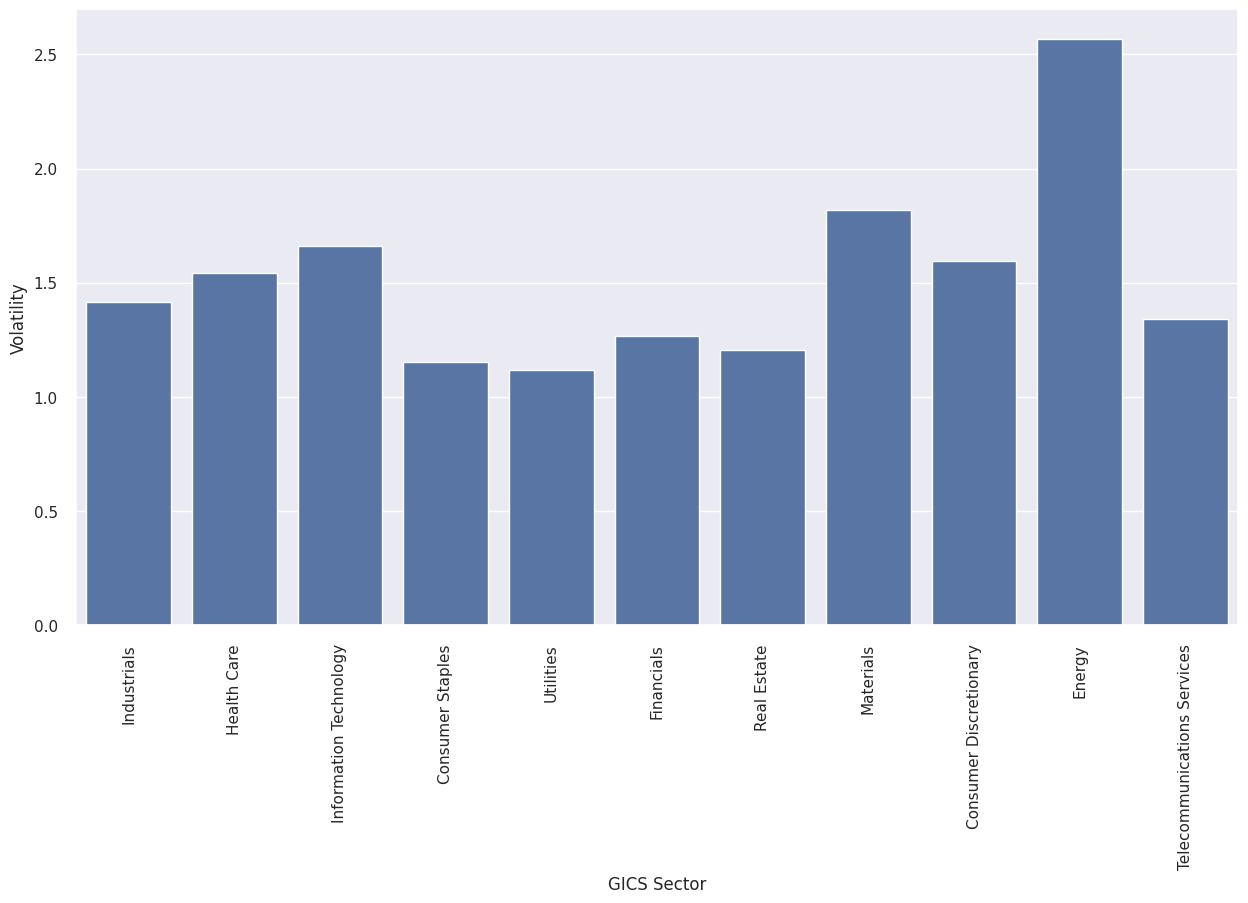

In [112]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

* Energy sector has the highest volatility.

## Data Preprocessing

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

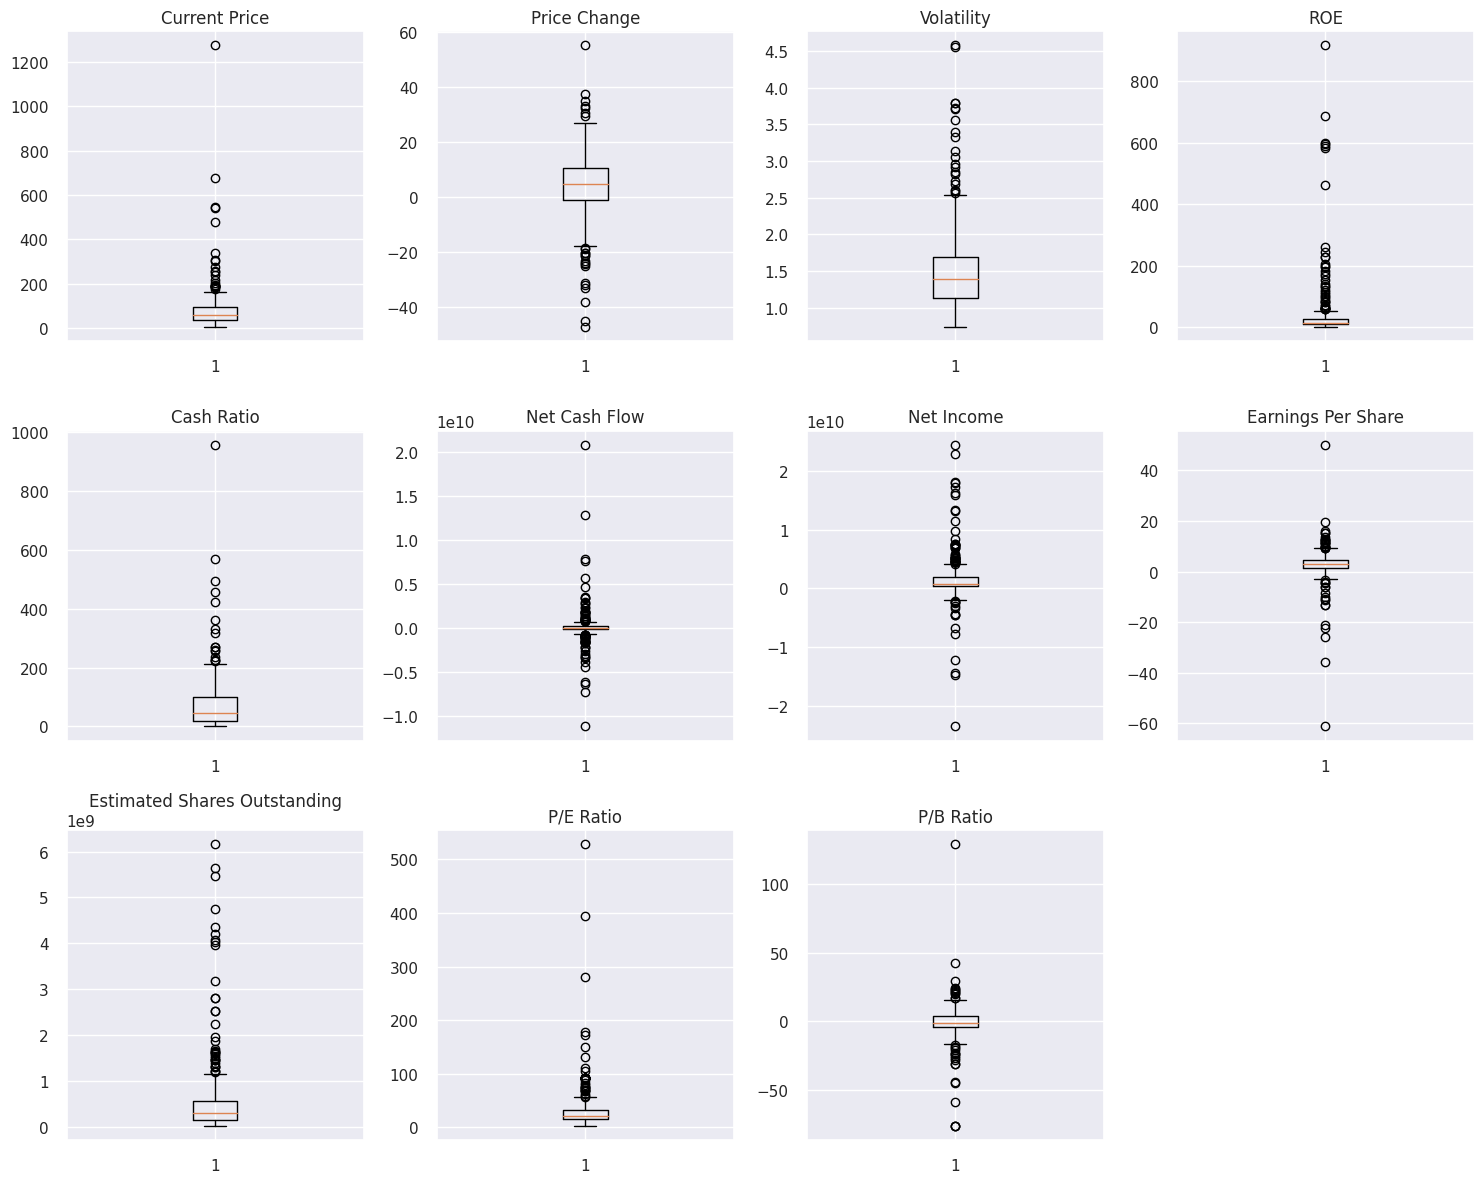

In [113]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* All data have outliers.

### Scaling

- Let's scale the data before we proceed with clustering.

In [114]:
num_col=['Current Price','Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']

In [115]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [116]:
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

### Checking Elbow Plot

In [117]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


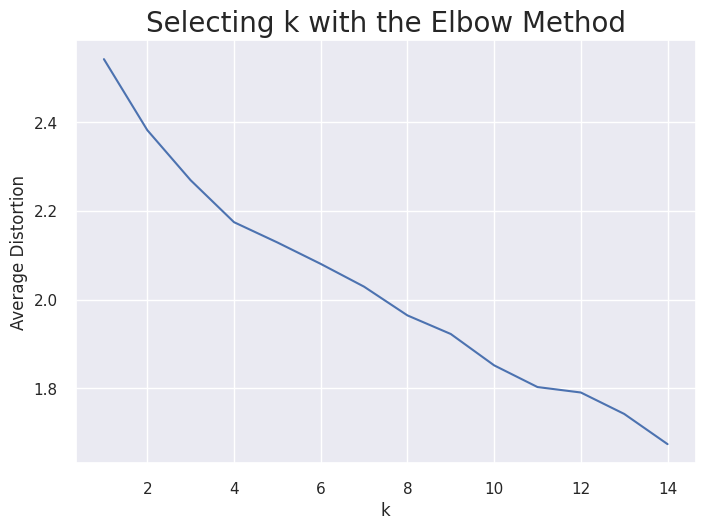

In [118]:
clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

* The appropriate value of k from the elbow curve seems to be 6 or 8.

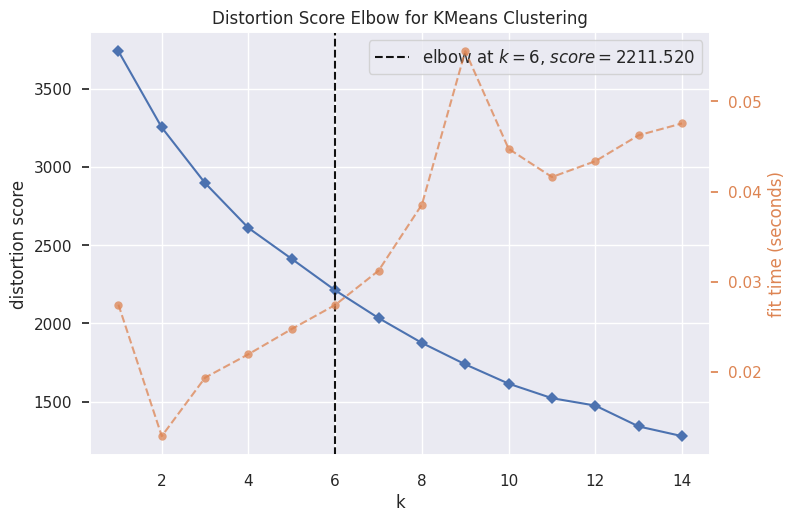

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [119]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


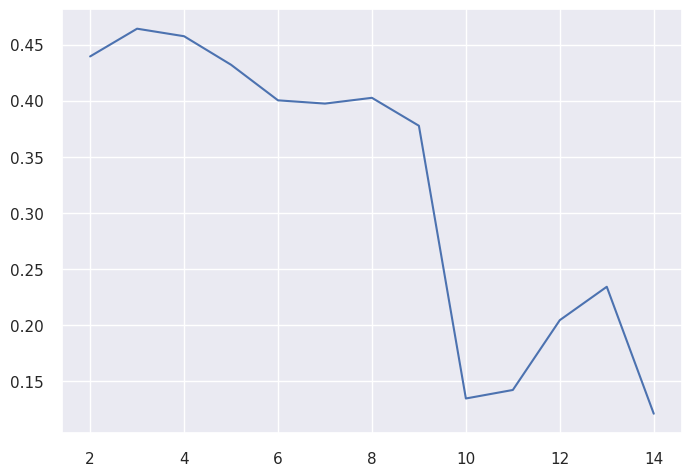

In [120]:
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

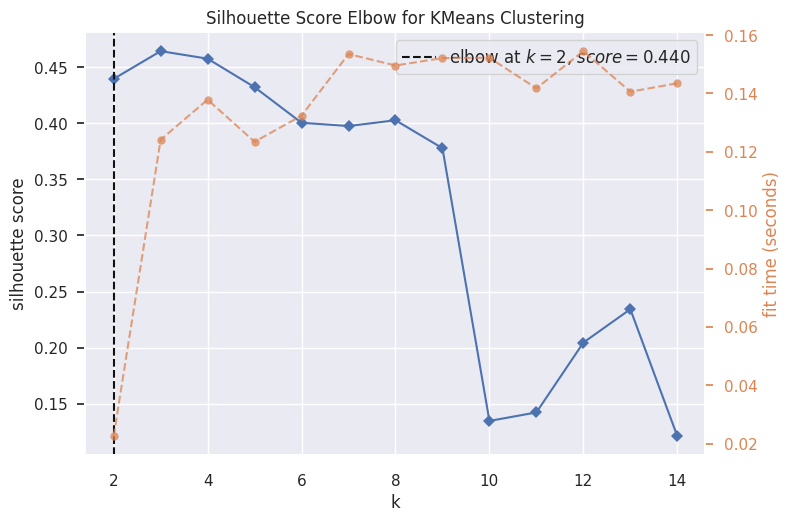

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [121]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* From the silhouette scores, it seems that 8 is a good value of k.

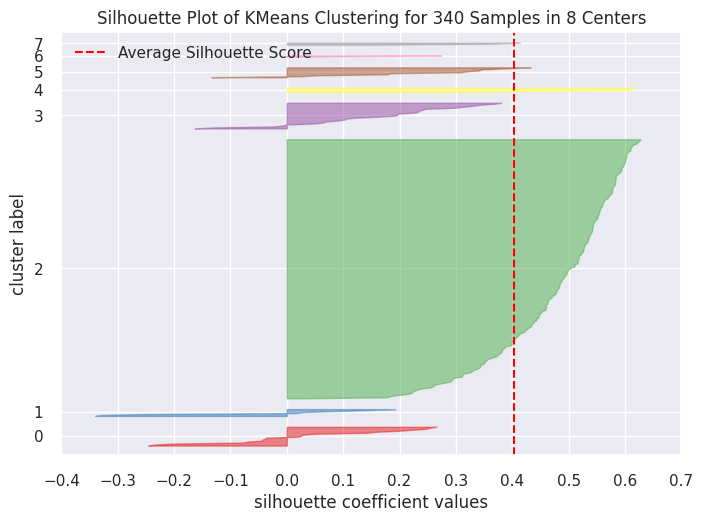

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

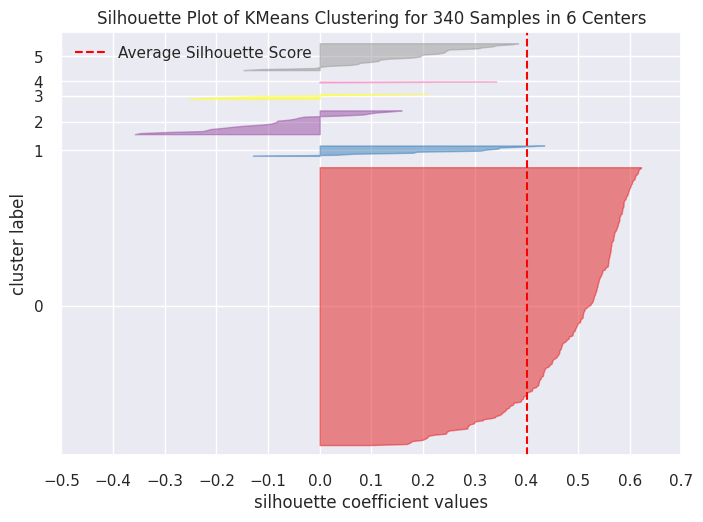

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [123]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

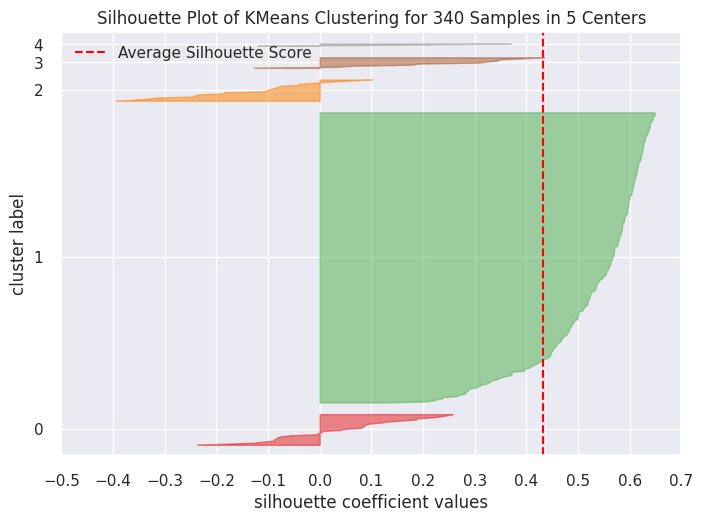

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [124]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

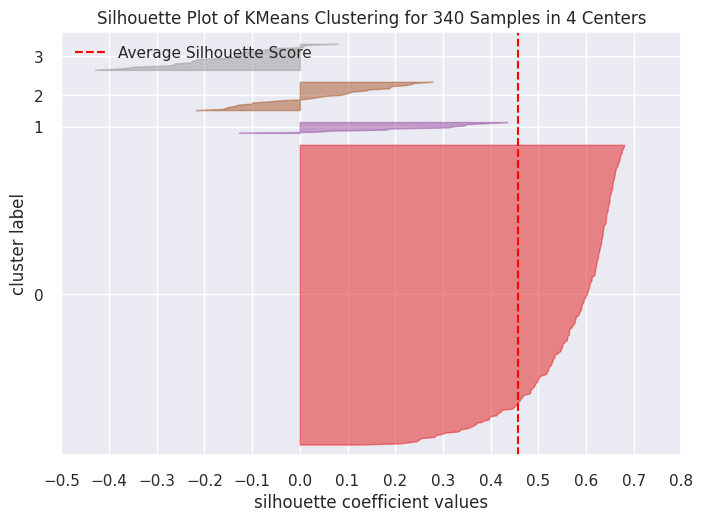

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [125]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

### Creating Final Model

* Let's take 6 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 5 in the elbow curve.

In [126]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [127]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [128]:
km_cluster_profile = df1.groupby("KM_segments").mean()

In [129]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [130]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [131]:
## print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Ca

In [132]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    30
             Industrials                    51
             Information Technology         20
             Materials                      17
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     2
             Information Technology          1
             Telecommunications Services     2
2            Consumer Discretionary          4
             Consumer Staples                1
             Energy

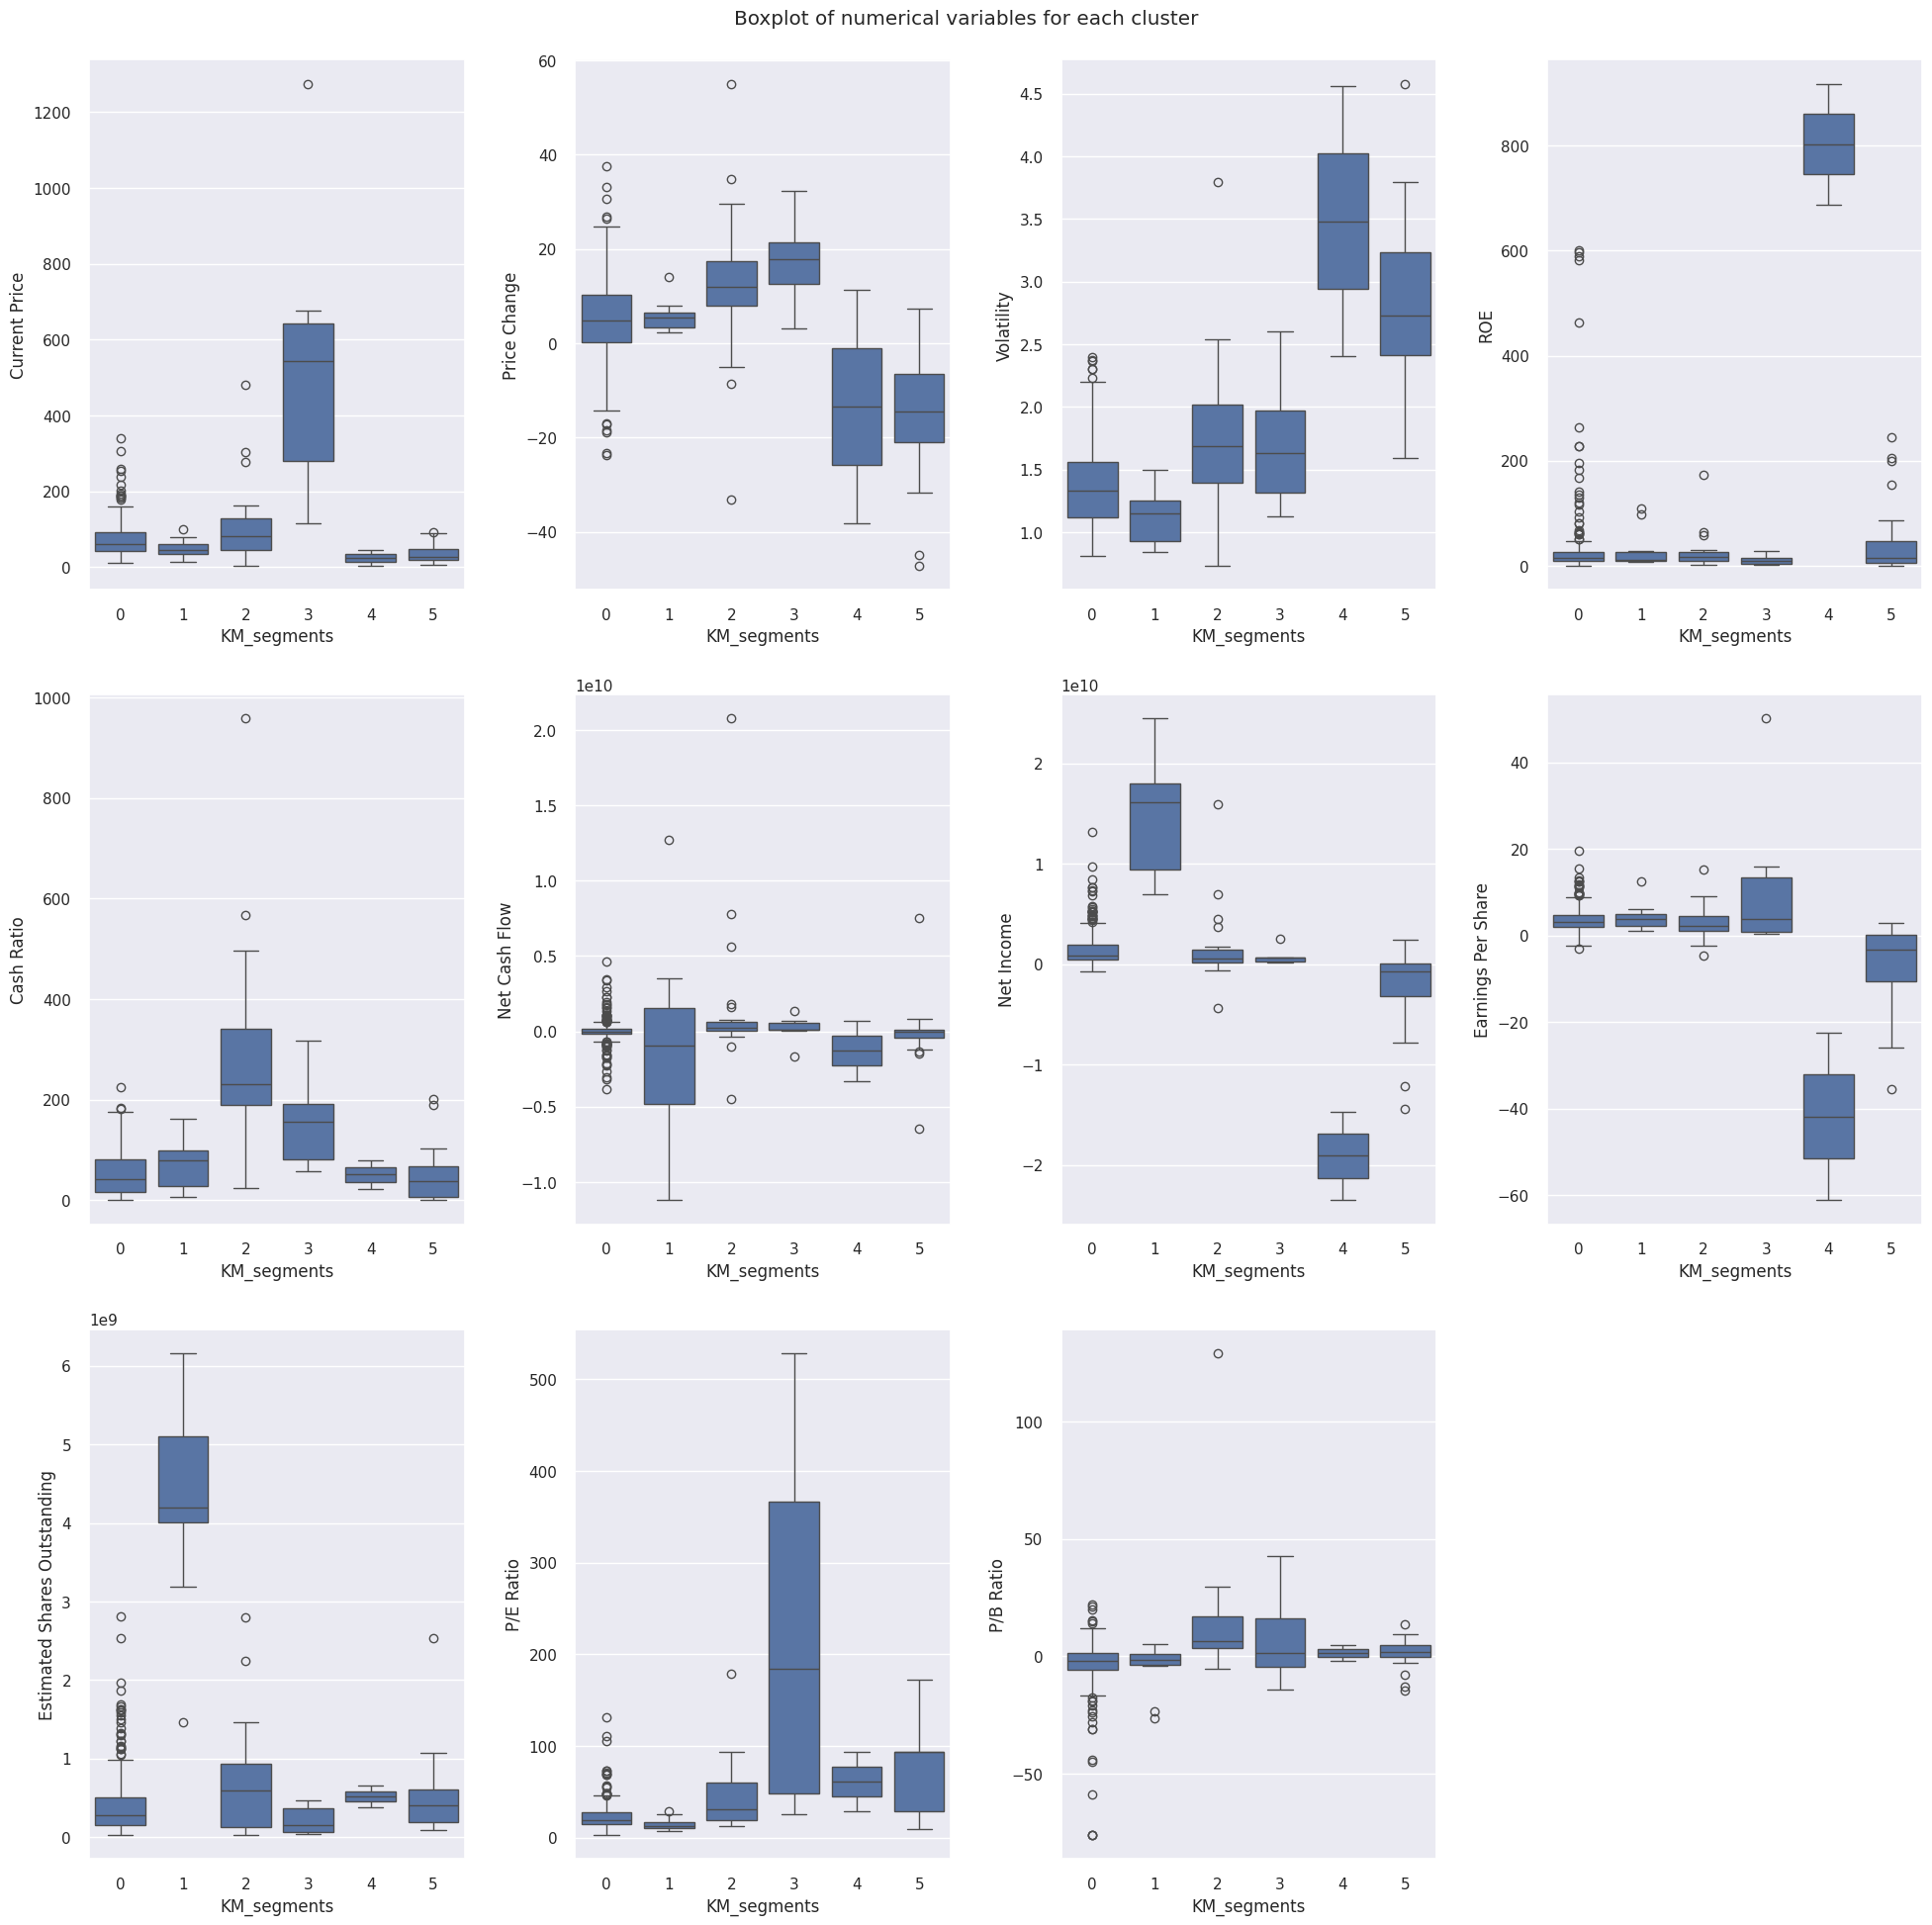

In [133]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

<Axes: xlabel='KM_segments'>

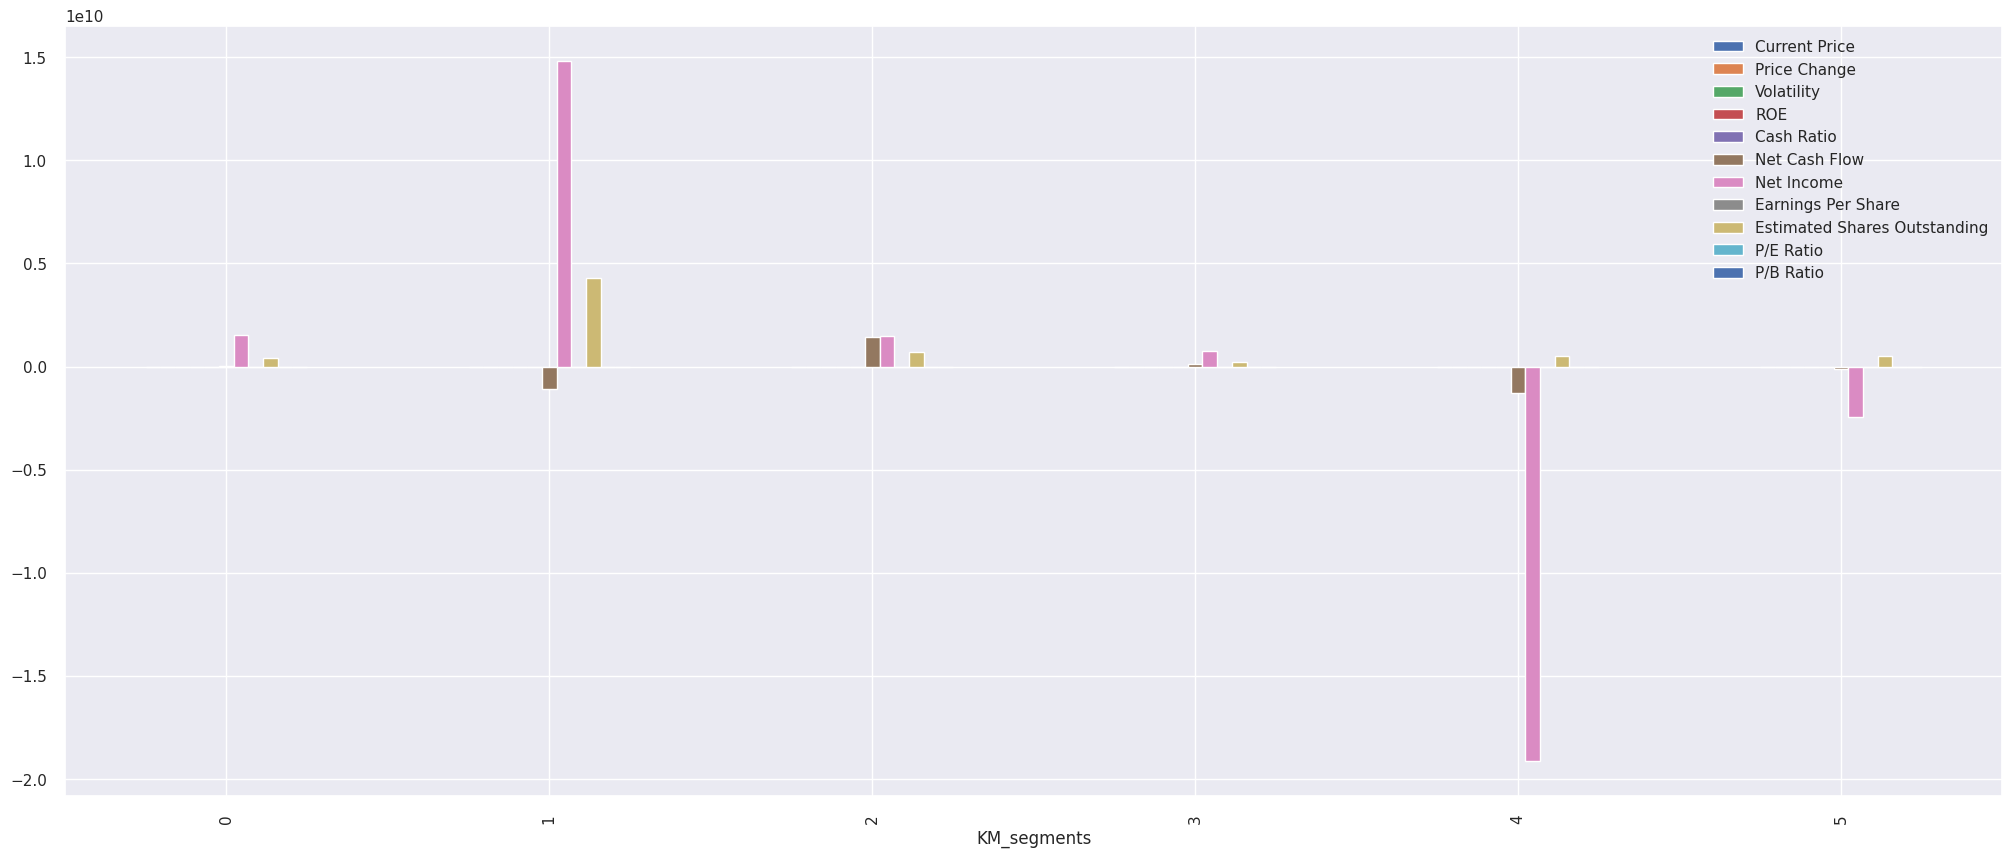

In [137]:
df1.groupby("KM_segments").mean().plot.bar(figsize=(25, 10))

### Insights


Cluster Characteristics:

 **Cluster 0:** This cluster has relatively high current prices, positive price changes, moderate volatility, high ROE (Return on Equity), and a positive cash ratio. The P/E ratio and P/B ratio are also relatively high. It has a significant number of observations (270).

  **Cluster 1:** This cluster exhibits moderate current prices, positive price changes, lower volatility, and positive ROE. The cash ratio is relatively high, indicating good liquidity. However, it has a negative net cash flow and net income. This cluster has fewer observations (11).

  **Cluster 2:** This cluster shows high current prices, positive price changes, high volatility, moderate ROE, and a substantial cash ratio. The P/E ratio is also high. It has a moderate number of observations (24).

 **Cluster 3:**This cluster has the highest current prices, significant positive price changes, moderate volatility, but the lowest ROE among the clusters. It has a relatively high cash ratio and positive net cash flow. The number of observations is relatively low (6).

  **Cluster 4:**This cluster has the lowest current prices, substantial negative price changes, and high volatility. The ROE is exceptionally high, but there's a negative net cash flow and net income. It has a low number of observations (2).

  **Cluster 5:** This cluster has moderate current prices, significant negative price changes, and moderate volatility. The ROE is moderate, with a positive cash ratio. There's a negative net cash flow and net income. It has a higher number of observations (27).


**Observations:**

 * Clusters 0, 2, and 3 have positive net cash flows, while Clusters 1, 4, and 5 show negative net cash flows.

 * Cluster 4 stands out with an extremely high ROE, but it also has negative net income and net cash flow.

**Number of Observations:**

  Clusters 0 and 5 have the highest number of observations, indicating that they represent a larger portion of the dataset.

**Cluster Profiles:**

  Cluster 0 appears to represent financially stable companies with high stock prices and positive performance indicators.

  Cluster 3 represents companies with the highest stock prices but with a lower ROE compared to other clusters.

  Cluster 4 represents companies with very low stock prices but an extremely high ROE.

  Cluster 1 and 5 represent companies with negative net cash flows, indicating potential financial challenges.

  Cluster 2 represents companies with high stock prices, high volatility, and positive financial performance.

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [138]:
hc_df = subset_scaled_df.copy()

In [139]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

**Let's explore different linkage methods with Euclidean distance only.**

In [140]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

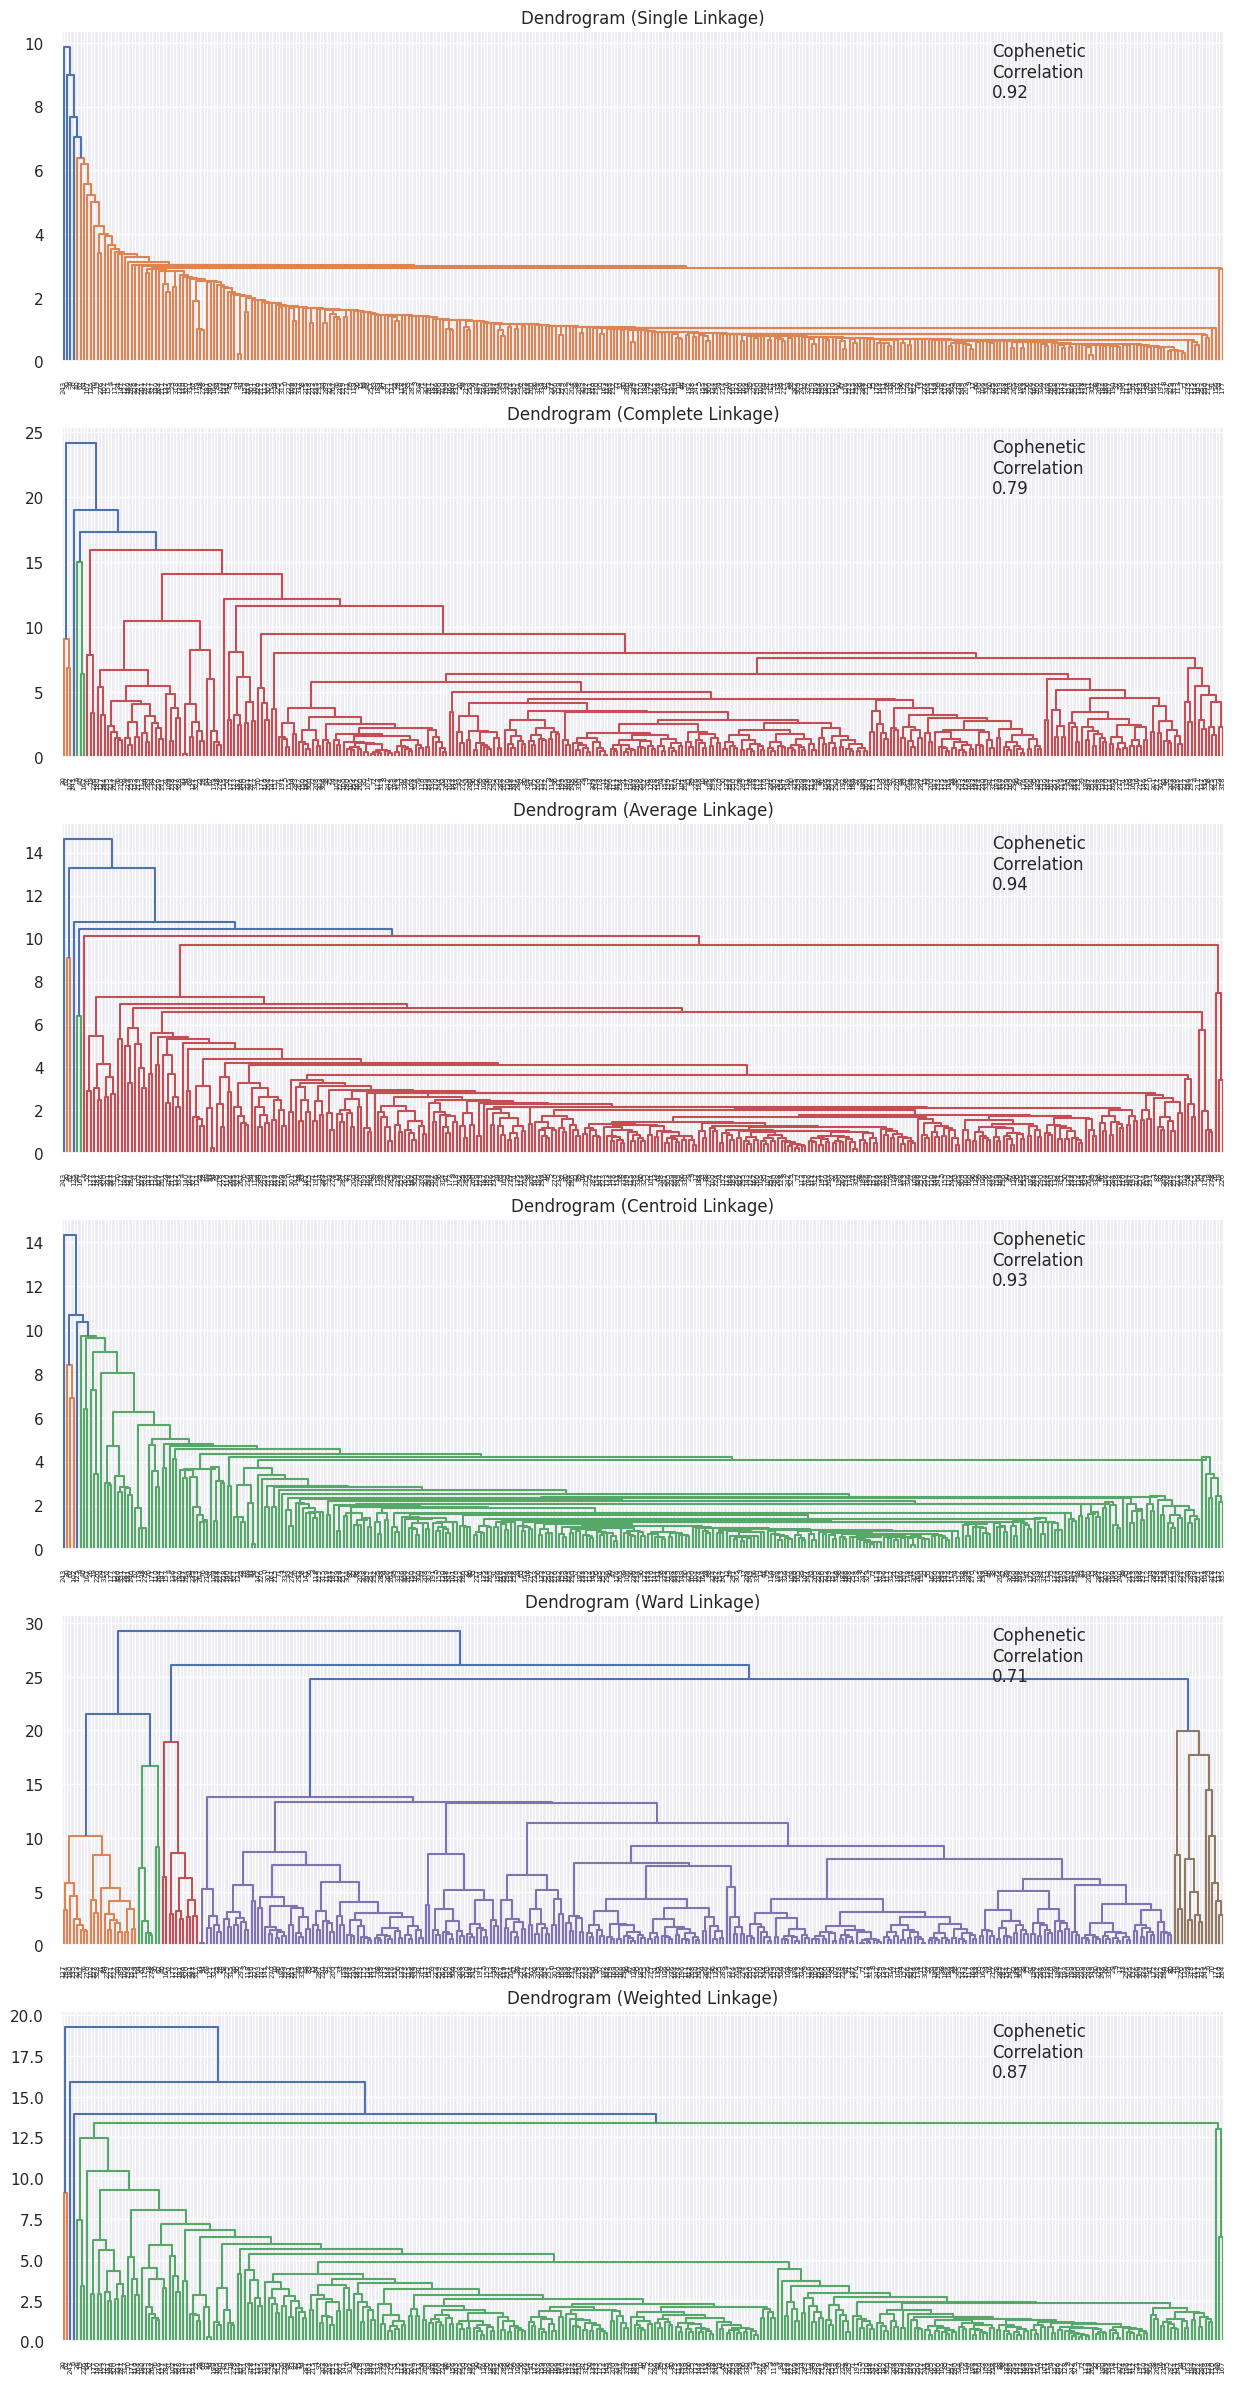

In [141]:
# list of linkage methods
linkage_methods =  ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [142]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

Linkage  Cophenetic Coefficient
4      ward                0.710118
1  complete                0.787328
5  weighted                0.869378
0    single                0.923227
3  centroid                0.931401
2   average                0.942254

### Creating model using sklearn

In [143]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=6)

In [144]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [145]:
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [146]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values  ## Complete the code to groupby the cluster labels
)

In [147]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [148]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

In [149]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         39
             Consumer Staples               19
             Energy                         28
             Financials                     48
             Health Care                    40
             Industrials                    53
             Information Technology         30
             Materials                      20
             Real Estate                    27
             Telecommunications Services     5
             Utilities                      24
1            Financials                      1
             Information Technology          1
2            Energy                          2
3            Information Technology          1
4            Consumer Discretionary          1
5            Information Technology          1
Name: Security, dtype: int64

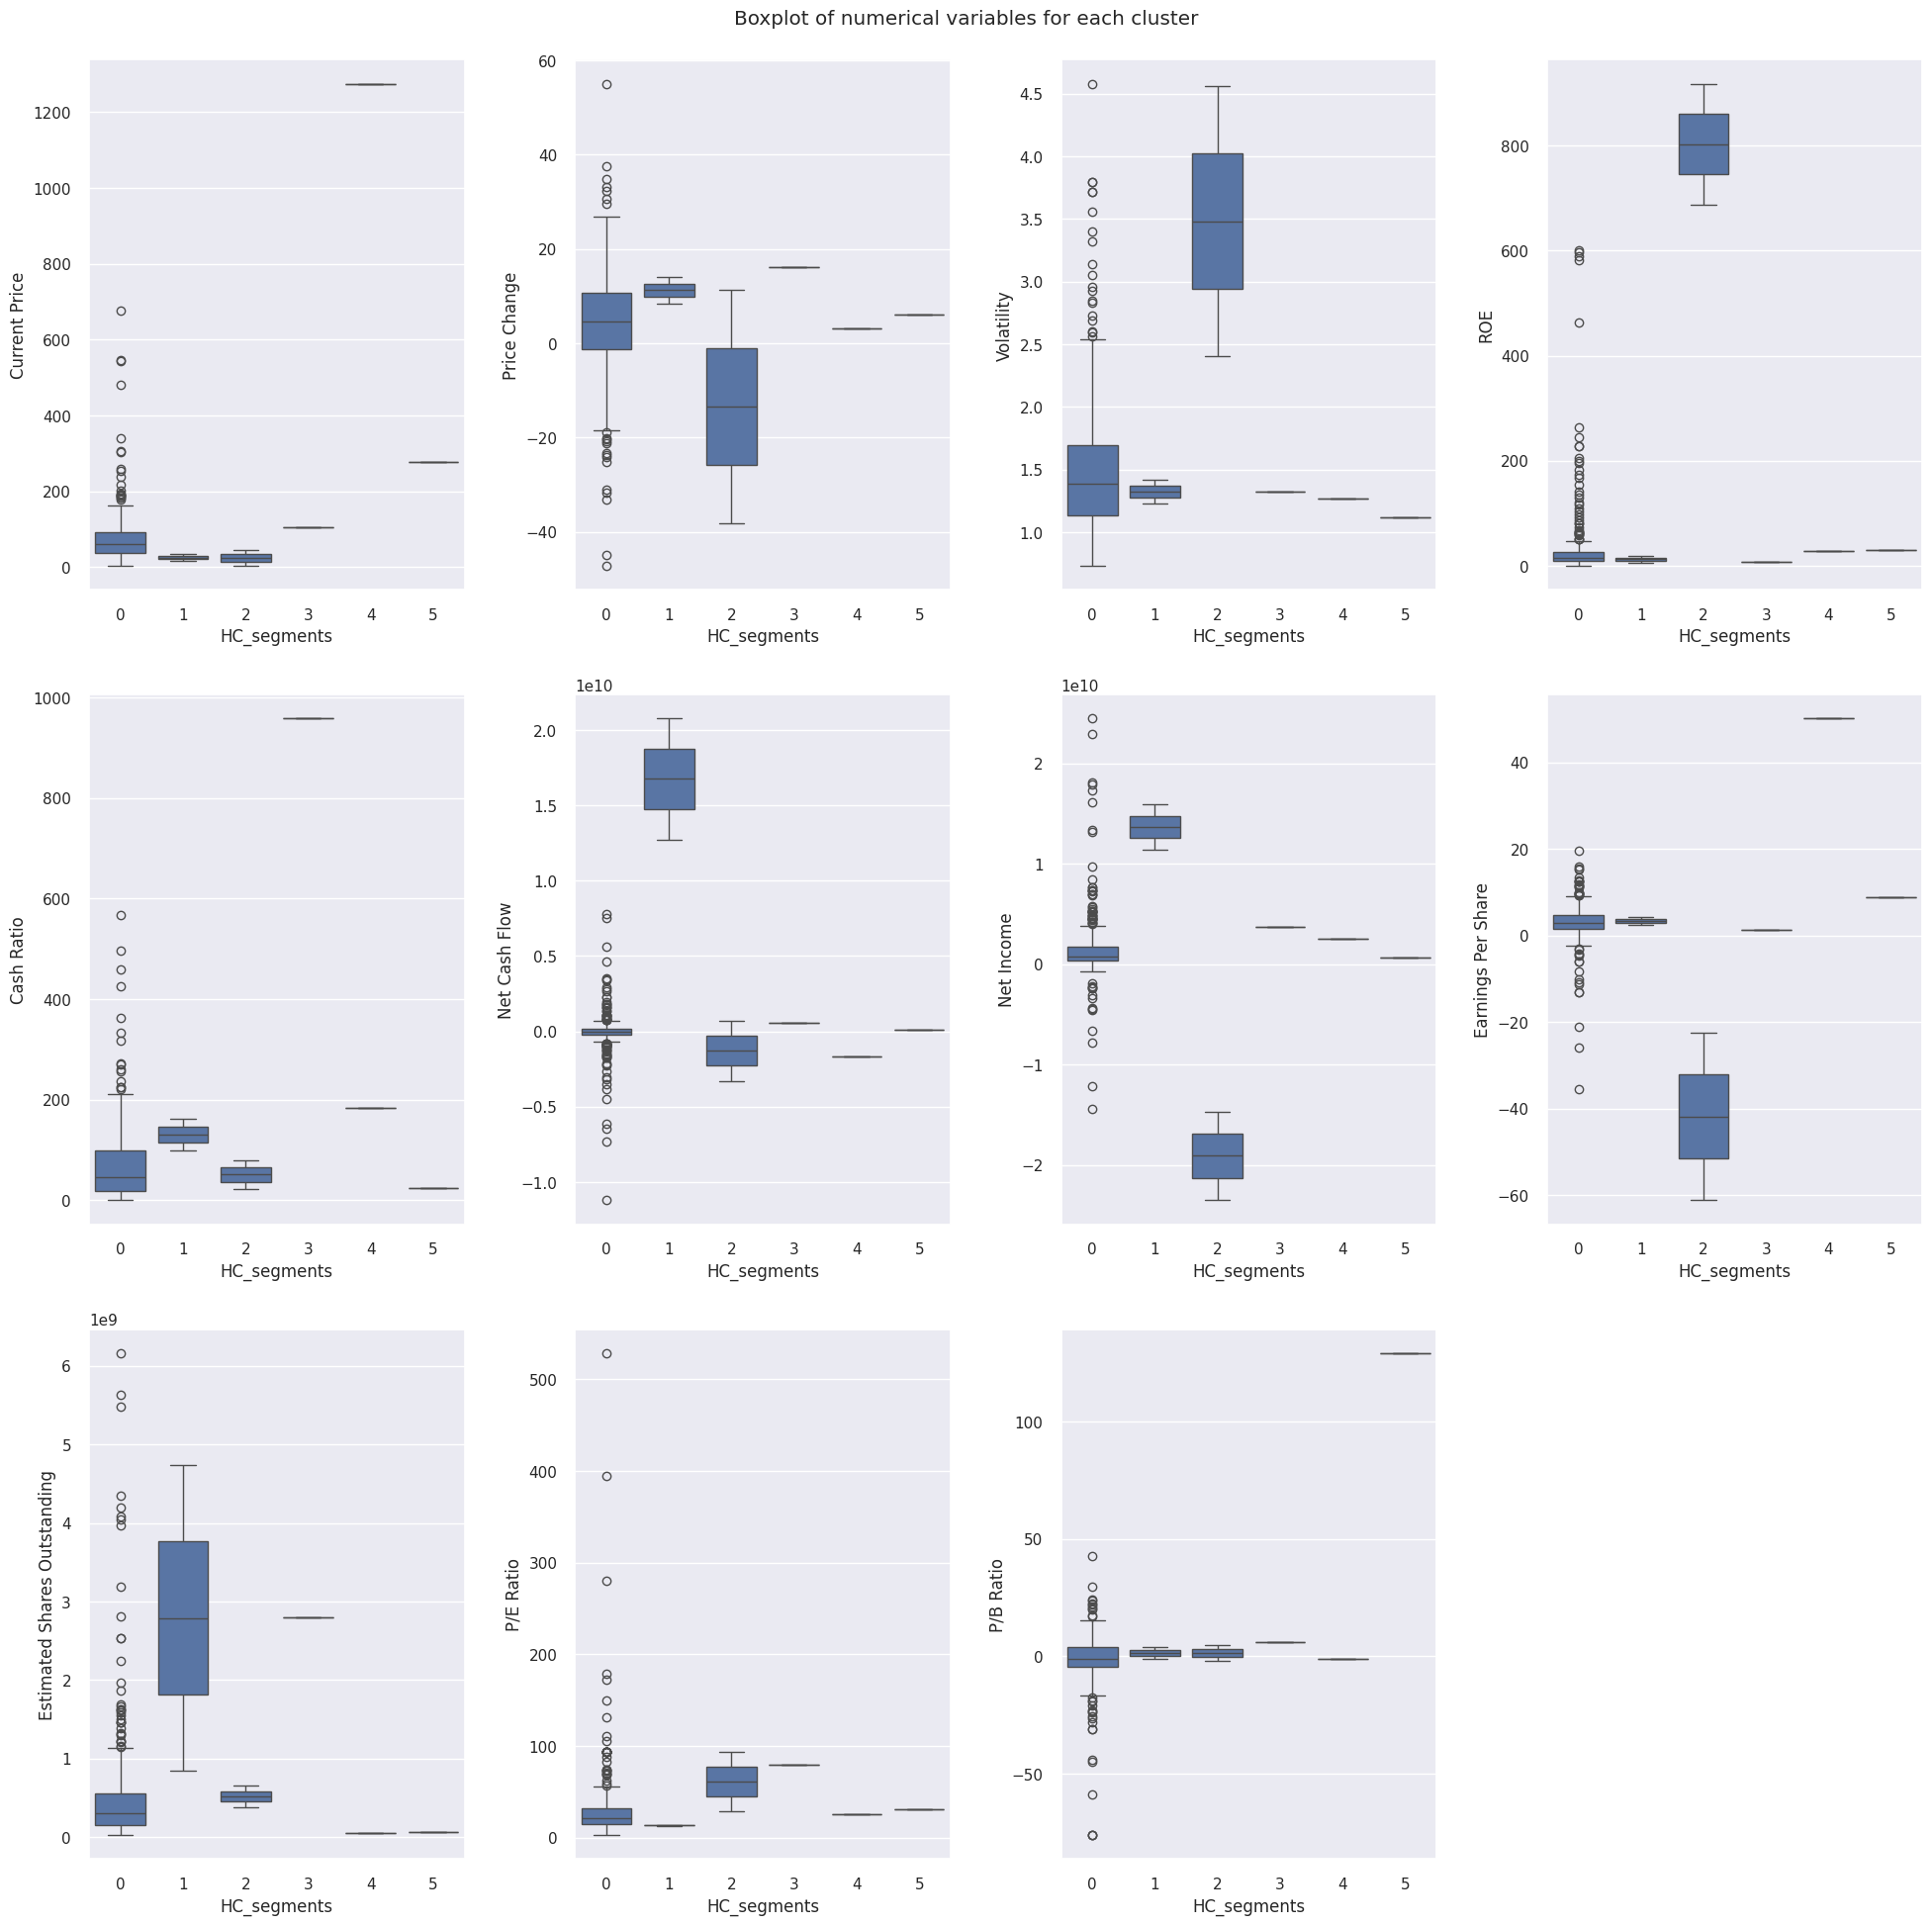

In [150]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Cluster Characteristics:**

**Cluster 0:** This cluster has moderate to high current prices, positive price changes, moderate volatility, high ROE, and a relatively high cash ratio. It has a positive net cash flow and net income. The P/E ratio and P/B ratio are moderate. This is the largest cluster with 333 observations.

**Cluster 1:**This cluster represents companies with relatively low current prices, significant positive price changes, moderate volatility, and a moderate ROE. It has a positive net cash flow and net income. The number of observations is low (2).

**Cluster 2:** Similar to the K-means analysis, this cluster has the lowest current prices, substantial negative price changes, and high volatility. The ROE is exceptionally high, but there's a negative net cash flow and net income. It has a low number of observations (2).

**Cluster 3:**This cluster consists of companies with high current prices, significant positive price changes, low volatility, and a low ROE. The cash ratio is high, and it has positive net cash flow and net income. There's a moderate number of observations (1).

**Cluster 4:** This cluster represents companies with very high current prices, positive price changes, low volatility, and a moderate ROE. The cash ratio is low, but it has positive net cash flow and net income. There's only one observation.

**Cluster 5:** This cluster has high current prices, positive price changes, low volatility, a moderate ROE, and a low cash ratio. It has positive net cash flow and net income. There's only one observation.

**Observations:**

  Similar to K-means, Cluster 2 has a remarkably high ROE, but it also has negative net income and net cash flow.

  Cluster 0 and Cluster 3 seem to represent financially stable companies with positive net cash flows.

**Number of Observations:**

  Cluster 0 has the highest number of observations, indicating that it represents a larger portion of the dataset.

**Cluster Profiles:**

  Cluster 0 seems to include a diverse set of companies with moderate to high financial performance.

  Cluster 3 represents companies with high stock prices, positive performance indicators, and low volatility.

  Cluster 2 represents companies with very low stock prices but an extremely high ROE.

  Cluster 1 represents companies with relatively low stock prices but positive financial indicators.

  Cluster 4 and Cluster 5 both have only one observation each, indicating unique entities.

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

1. Execution Time:

    K-means: Typically faster than hierarchical clustering.
    Hierarchical Clustering: Can be computationally more expensive, especially for large datasets. The time complexity is generally higher than K-means.

2. Number of Clusters:

    K-means: Requires specifying the number of clusters (k) in advance. The choice of k can significantly impact the results.
    Hierarchical Clustering: Does not require specifying the number of clusters beforehand. The dendrogram can be used to decide the number of clusters based on the desired level of granularity.

3. Similarity of Clusters:

    K-means and Hierarchical Clustering: Similarities in cluster assignments might occur, but they can also differ, especially when the data has complex structures. It depends on the nature of the data and the algorithm's sensitivity to initial conditions.

4. Number of Observations in Similar Clusters:

    K-means and Hierarchical Clustering: The number of observations in similar clusters can vary based on the algorithm, data distribution, and the number of clusters chosen.

5. Appropriate Number of Clusters:

    K-means: The appropriate number of clusters involves techniques like the elbow method or silhouette analysis.
    Hierarchical Clustering: The appropriate number of clusters determined by examining the dendrogram or using methods like the cophenetic correlation coefficient.

6. Cluster Profiles:

    K-means and Hierarchical Clustering: The resulting cluster profiles might differ. K-means tends to create spherical clusters, while hierarchical clustering can capture more complex shapes.

Conclusion:

  K-means: Fast and efficient for well-separated, spherical clusters when the number of clusters is known in advance.
  Hierarchical Clustering: More flexible, suitable for various cluster shapes, and doesn't require pre-specification of the number of clusters.

Choosing between K-means and Hierarchical Clustering depends on the characteristics of our data and the goals of our analysis. I would choose K-Means Clustering for our project.

  **Cluster Profiles:**
  **K-means:** Cluster profiles for K-means include characteristics like current price, price change, volatility, ROE, cash ratio, net cash flow, and more. Notable differences between clusters were discussed, such as high stability in Cluster 0 and unique features in Cluster 4.

  **Hierarchical Clustering:** Cluster profiles for Hierarchical Clustering also include similar financial metrics, and notable differences between clusters were highlighted, such as the diverse set of companies in Cluster 0 and the unique characteristics of Cluster 2.

**Conclusion:** Both clustering techniques provide detailed cluster profiles, emphasizing the financial metrics that distinguish each cluster.

##Insights and Recommendations:

**1. Cluster Analysis:**

Performing cluster analysis on the provided stock data is a crucial step in achieving the objectives set by Trade&Ahead. Below are key insights and recommendations based on the clusters generated:

**2. Cluster Characteristics:**

  Cluster 0 :
  Characteristics: Diverse companies with moderate performance.
  Recommendation: Suitable for investors seeking a balanced and diversified portfolio with moderate risk.

  Cluster 1 :
  Characteristics: High ROE, positive net cash flow, and stable stock prices.
  Recommendation: Attractive for investors looking for high-performing stocks with a focus on stability.

  Cluster 2 :
  Characteristics: Low stock prices, negative price changes, and high volatility.
  Recommendation: May indicate potential riskier investments; suitable for those with a high-risk tolerance.

**3. Observations and Similarities:**

  Common Characteristics:

  Both K-means and Hierarchical Clustering resulted in clusters with similar financial characteristics, such as high ROE in Cluster 4/2.

  Similarities in net cash flow and net income patterns across clusters in both techniques.

**4. Appropriate Number of Clusters:**

  Elbow Method and Silhouette Analysis:
  The appropriate number of clusters was determined using the elbow method and silhouette analysis, ensuring meaningful and distinct clusters.

**5. Differences in Profiles:**

  Cluster Profiles:
  K-means may have identified more distinct characteristics due to its sensitivity to spherical clusters, while hierarchical clustering is more flexible in capturing complex shapes.

**6. Recommendations for Actionable Insights:**

  Portfolio Construction:
  Construct portfolios by selecting stocks from different clusters to achieve diversification and minimize risk.

  Risk Management:
  Allocate investments based on risk tolerance, considering clusters with higher stability for conservative investors and those with higher risk for more aggressive investors.

  Monitoring Strategies:
  Continuously monitor clusters for shifts in financial metrics, ensuring investment strategies adapt to changing market conditions.

**7. Additional Considerations:**

  External Factors:
  Consider external factors such as market trends, economic conditions, and industry-specific events to complement cluster analysis.

  Validation and Review:
  Regularly validate and review clustering results to ensure they align with market dynamics and company performance.


By following these recommendations, Trade&Ahead can make more informed decisions, offer personalized investment strategies to their clients, and navigate the dynamic landscape of the stock market effectively.


___